# 卷积的可视化
----
----
* 人常说， 深度学习模型是视觉的“黑盒”。
* 对某些神经网络来说，这只有部分正确。
* 对卷积神经网络来说，它的模型非常适合可视化，很大程度上是因为它是视觉上的表达。
* 我们会介绍三种最容易理解也是最有用的三种方法：
    * 可视卷积神经网络的中间输出（中间激活）：有助于理解卷积网络的层是如何对输入进行变换，也有助于了解网络中每个过滤器的含义；
    * 可视卷积神经网络的过滤器：有助于精确理解卷积神经网络中每个过滤器容易接受的视觉模式或视觉概念；
    * 可视化图像中类激活的热力图：有助于理解图像的哪个部分被识别为属于某个类别，从而可以定位图像中的物体；
对于第一种方法，我们使用5.2节里从头训练的猫狗分类小型网络，另外两种，我们将使用VGG16模型。

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## 中间激活可视化

可视化中间激活，是指对于给定输入，展示网络中各个卷积层和池化层输出的特征图（层的输出通常被称为该层的激活，即激活函数的输出）。这让我们可以看到输入如何被分解为网络
学到的不同过滤器。  
我们希望在三个维度对特征图进行可视化：宽度、高度和深度（通道）。每个通道都对应相对独立的特征，所以将这些特征图可视化的正确方法是将每个通道的内容分别绘制成二维图像。  


In [4]:
# 加载之前的model
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()  # As a reminder.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

我们需要一个猫的图片，它不能属于训练图像:

In [5]:
img_path = 'D:\\mldata\\catdogs\\newdir\\test\\cats\\cat.1700.jpg'

# 把图片处理成4D张量
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# 用于模型训练的输入数据，都是这样来处理的：
img_tensor /= 255.

# 形状 (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


显示图片:

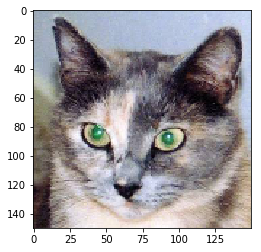

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

* 为了提取想要查看的特征图，我们需要创建一个 Keras 模型，以图像批量作为输入，并输出所有卷积层和池化层的激活。  
* 为此，我们需要使用 Keras 的 Model 类。模型实例化需要两个参数：一个输入张量（或输入张量的列表）和一个输出张量（或输出张量的列表）。
* 得到的类是一个Keras 模型，就像你熟悉的 Sequential 模型一样，将特定输入映射为特定输出。
* Model 类允许模型有多个输出，这一点与 Sequential模型不同。

In [8]:
from keras import models

# 提取前8层输出:
layer_outputs = [layer.output for layer in model.layers[:8]]
# 给定输入，创建模型并输出:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

当输入图像，这个模型将返回前8层的激活。这是一个多输出模型。一般情况下，模型可以有任意个输入和输出。  
本例中的模型有一个输入和8个输出，每层激活对应一个输出：

In [9]:
# 返回8个Numpy数组的list，每个激活对应一个数组
activations = activation_model.predict(img_tensor)

这个猫图片的第一个卷积层的激活：

In [56]:
print(len(activations))
first_layer_activation = activations[0]
print(first_layer_activation.shape)

8
(1, 148, 148, 32)


输出是一个148x148通道数为32的特张图。我们试试可视化一下第4个通道（通道序号从0开始）：
matshow()是一个矩阵可视化的方法。

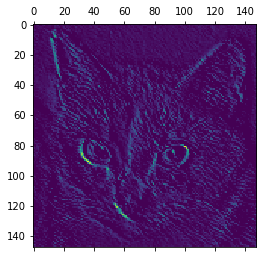

In [24]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

这个通道似乎是对角边缘检测器。我们再看一下第 7 个通道。但请注意，你的通道可能与此不同，因为卷积层学到的过滤器并不是确定的。

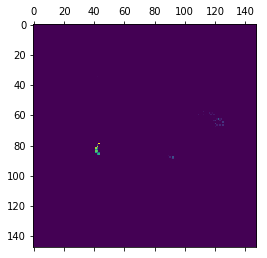

In [34]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
plt.show()

这个通道看起来像是“鲜绿色圆点”检测器，对寻找猫眼睛很有用。下面我们来绘制网络中所有激活的完整可视化。

(1, 148, 148, 32)
特征图中特征的个数: 32
(1, 74, 74, 32)
特征图中特征的个数: 32
(1, 72, 72, 64)
特征图中特征的个数: 64
(1, 36, 36, 64)
特征图中特征的个数: 64
(1, 34, 34, 128)
特征图中特征的个数: 128
(1, 17, 17, 128)
特征图中特征的个数: 128
(1, 15, 15, 128)
特征图中特征的个数: 128
(1, 7, 7, 128)
特征图中特征的个数: 128


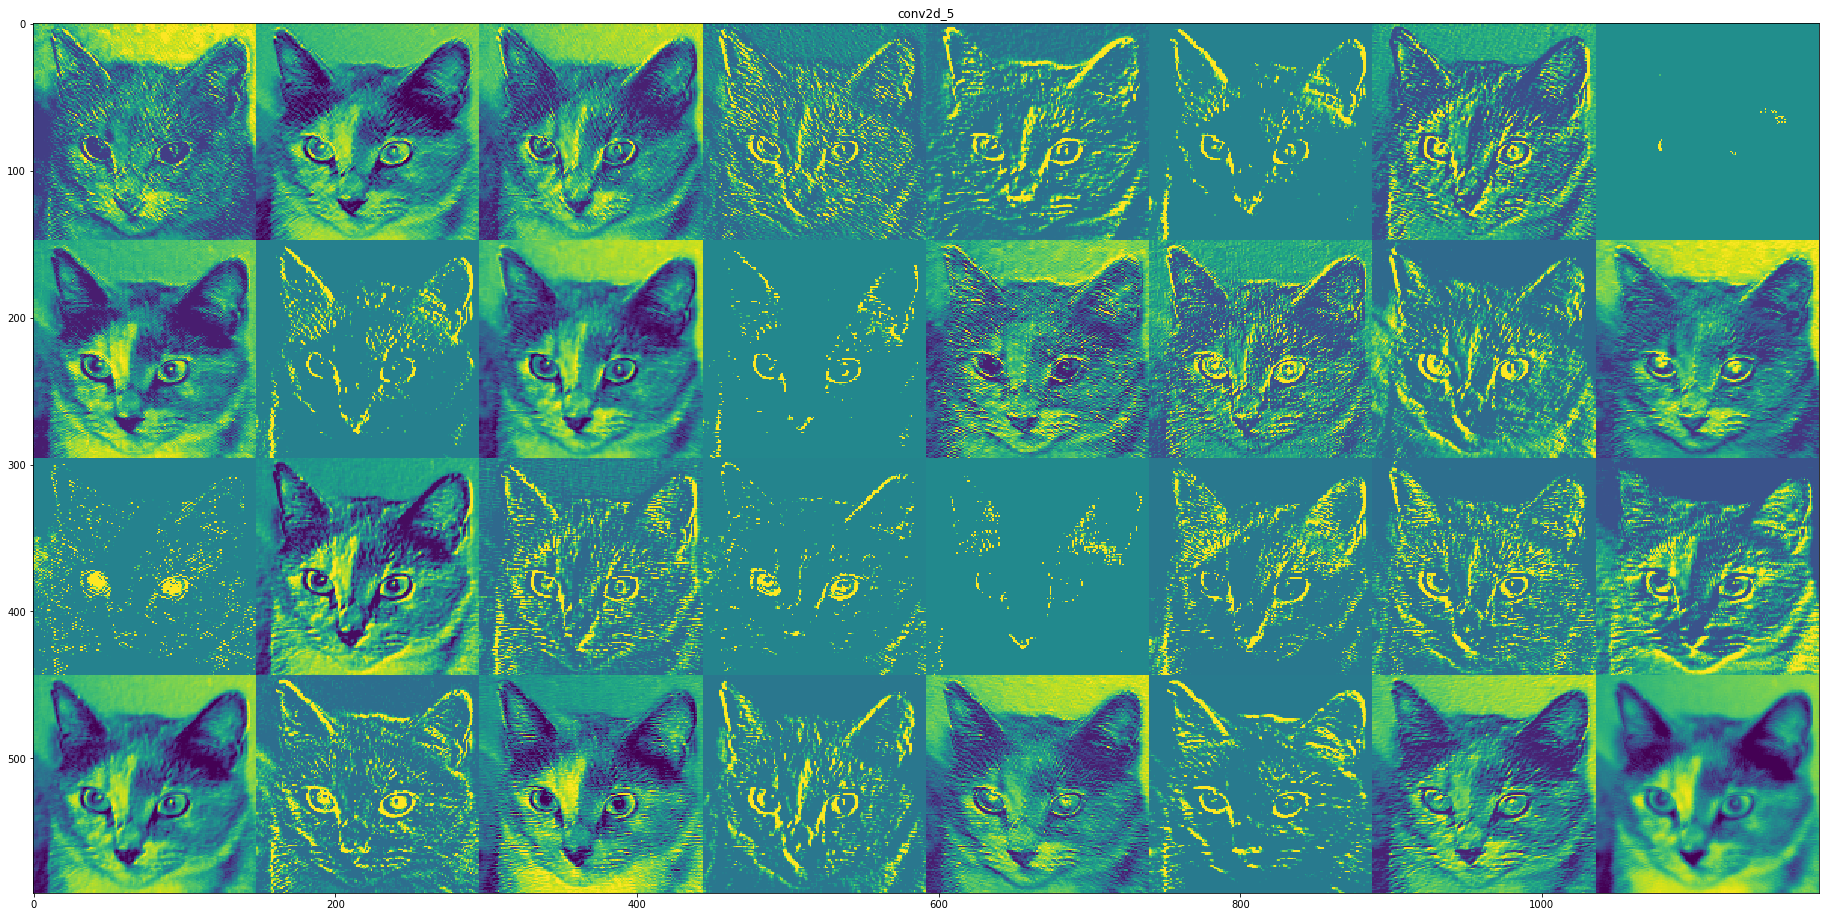

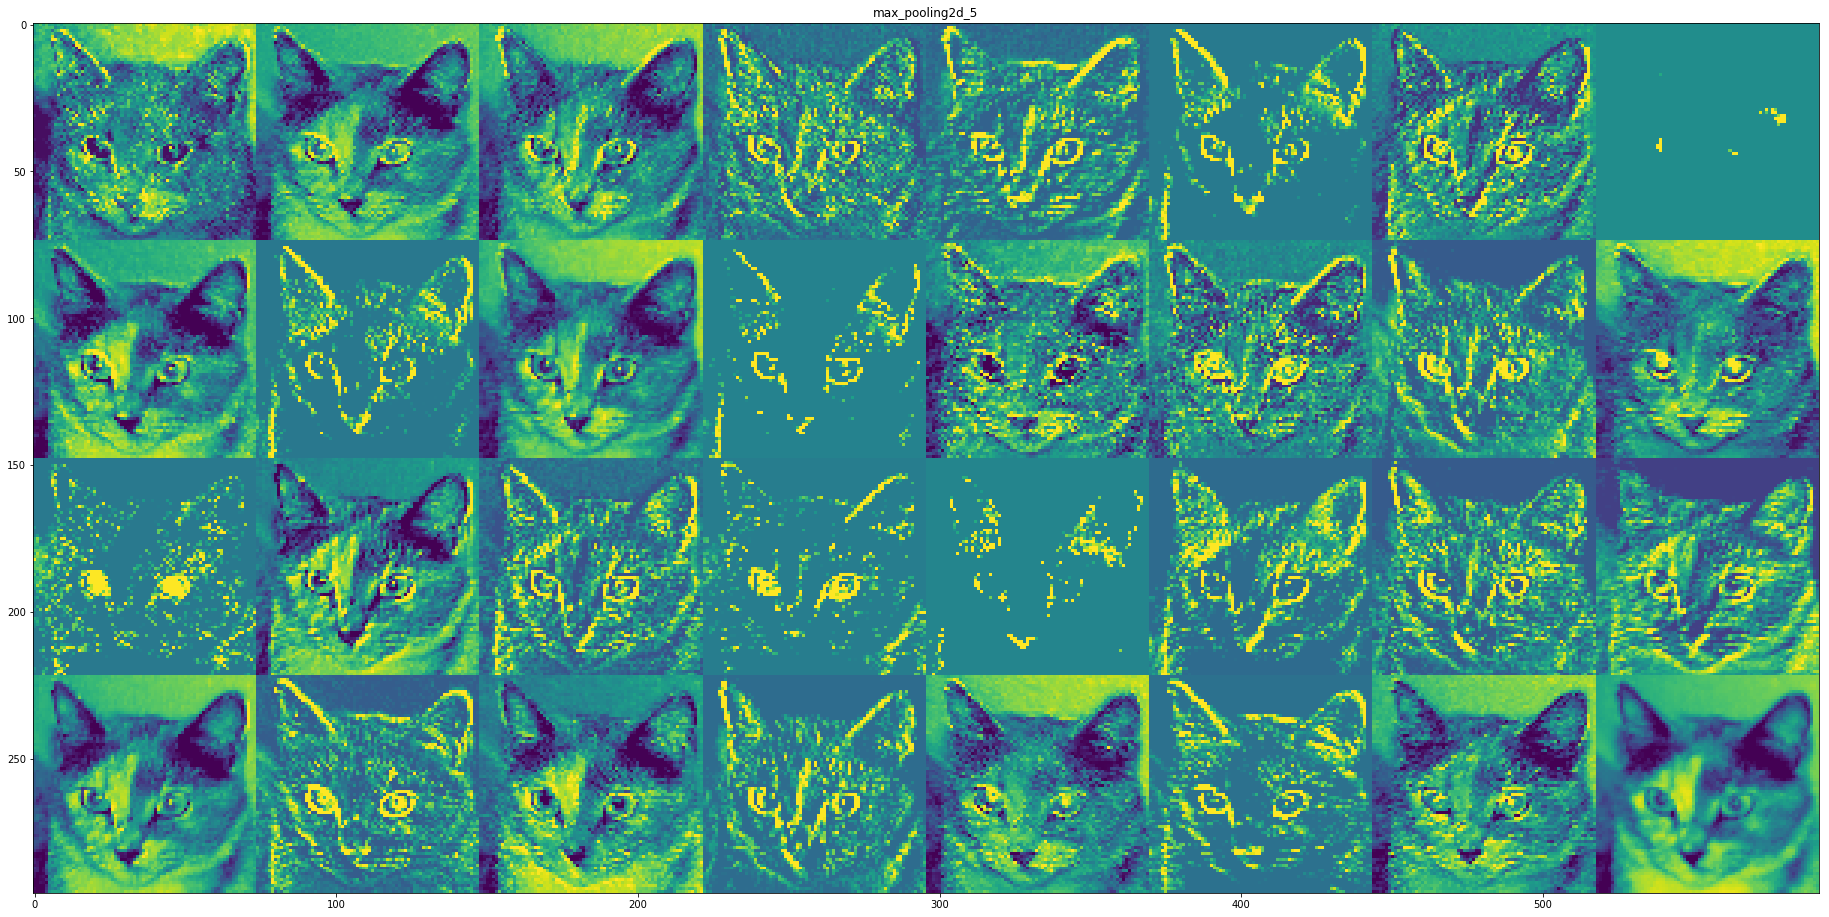

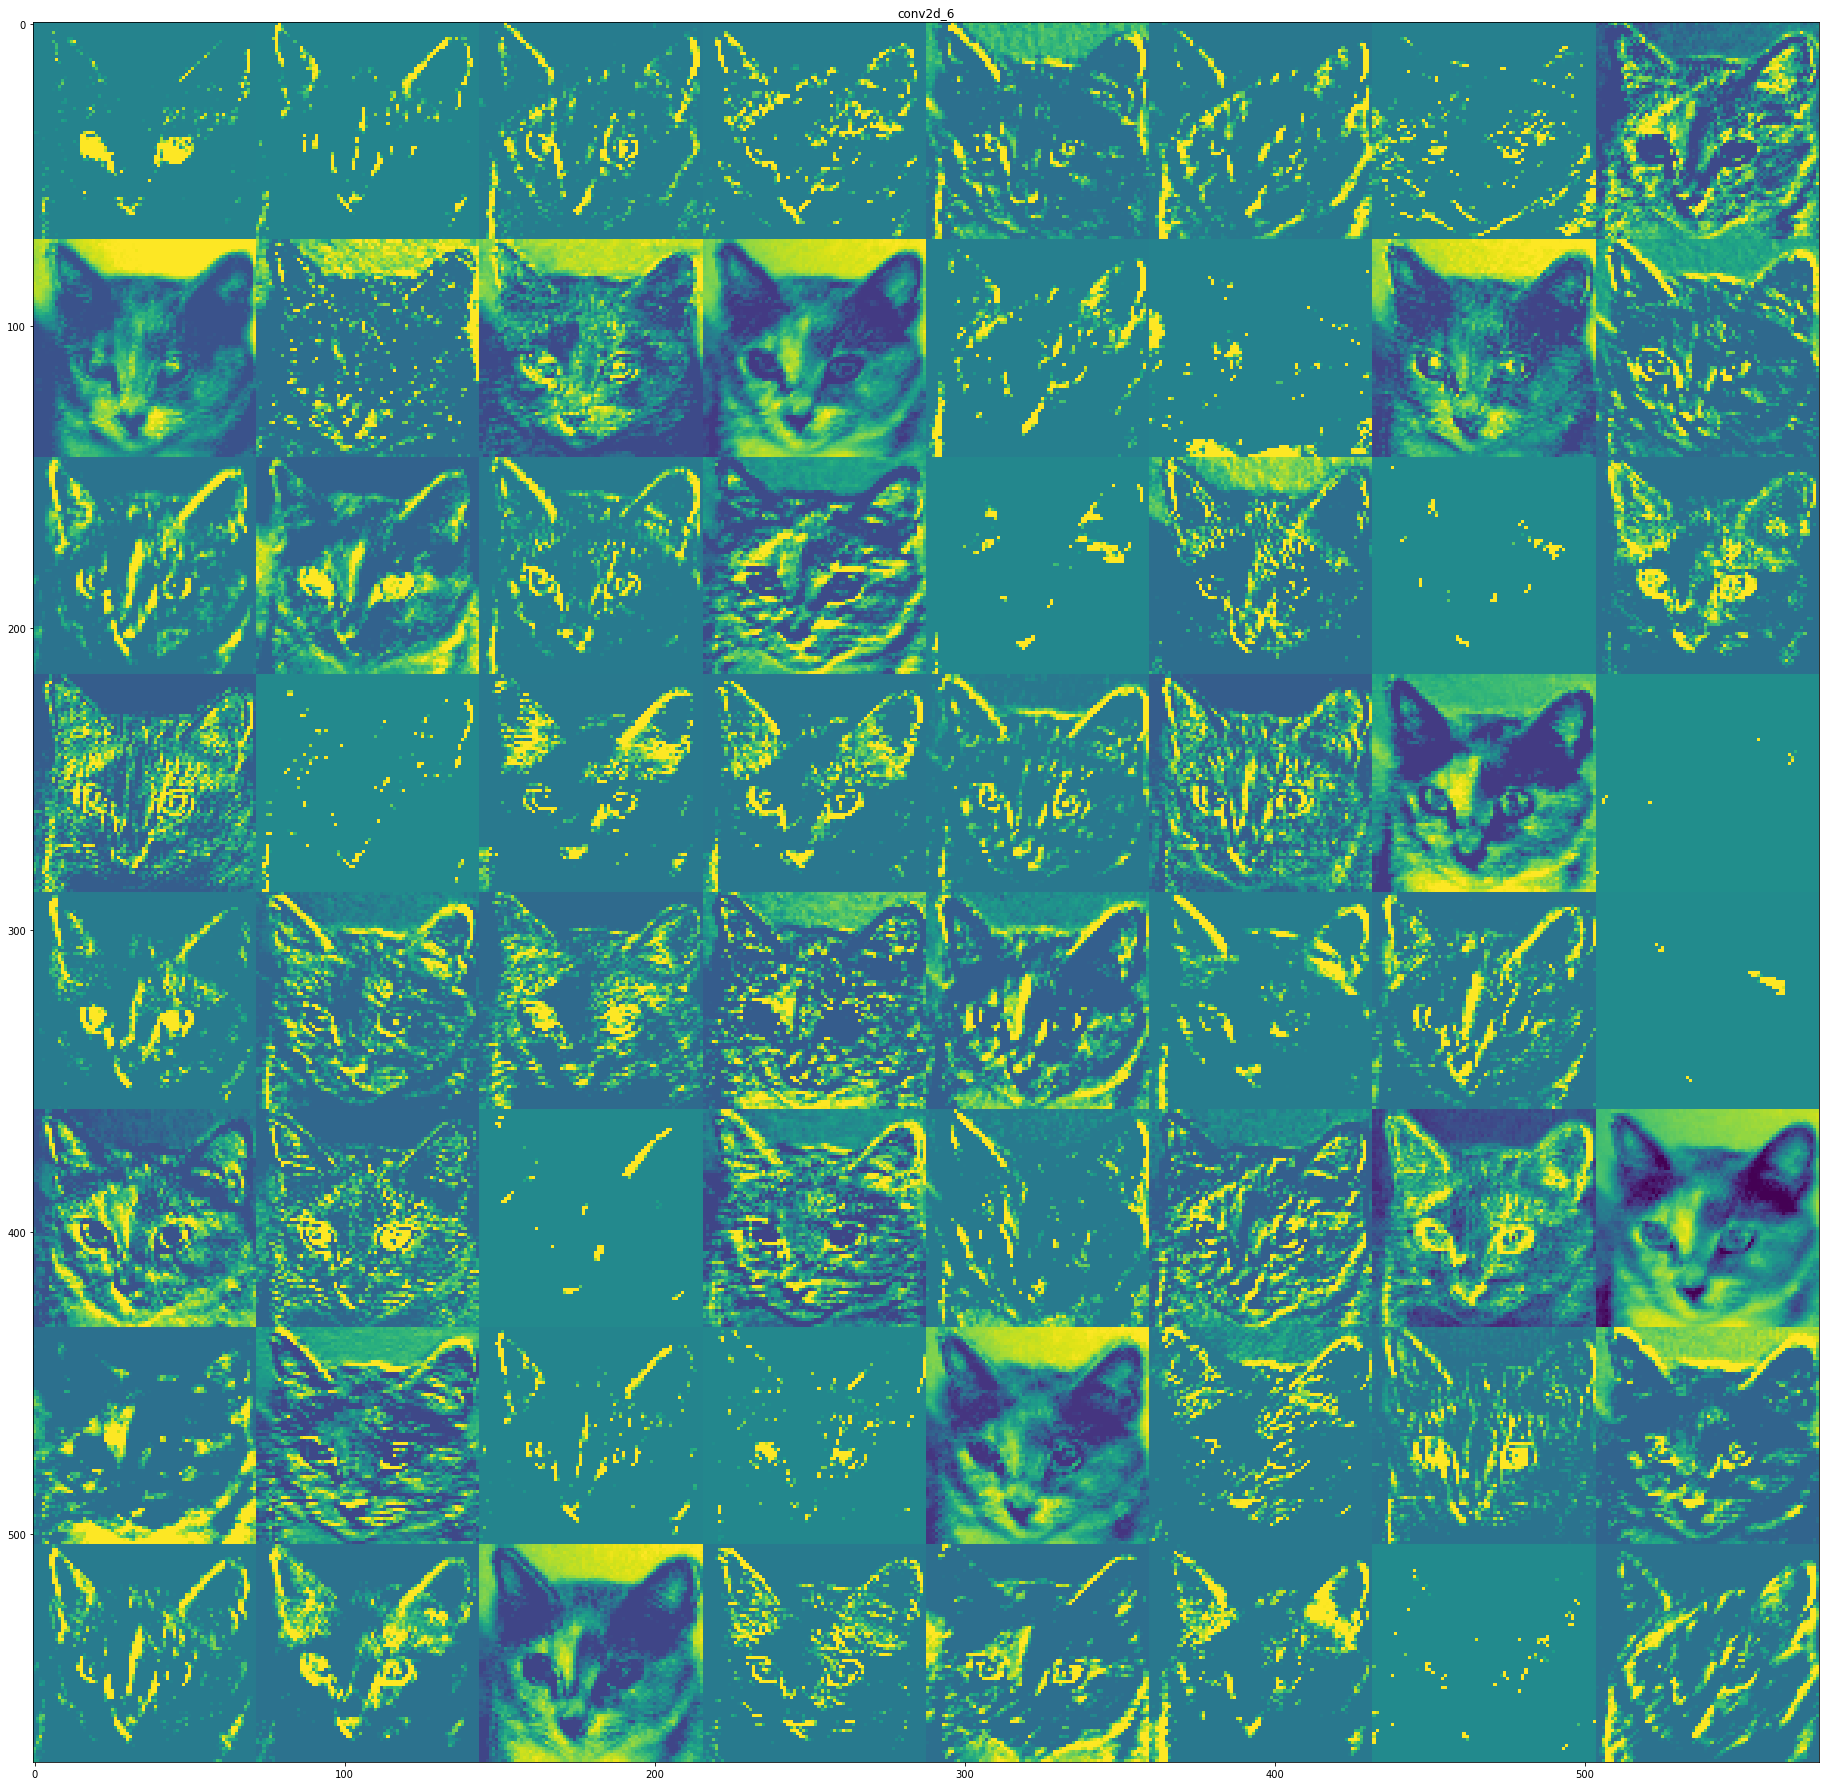

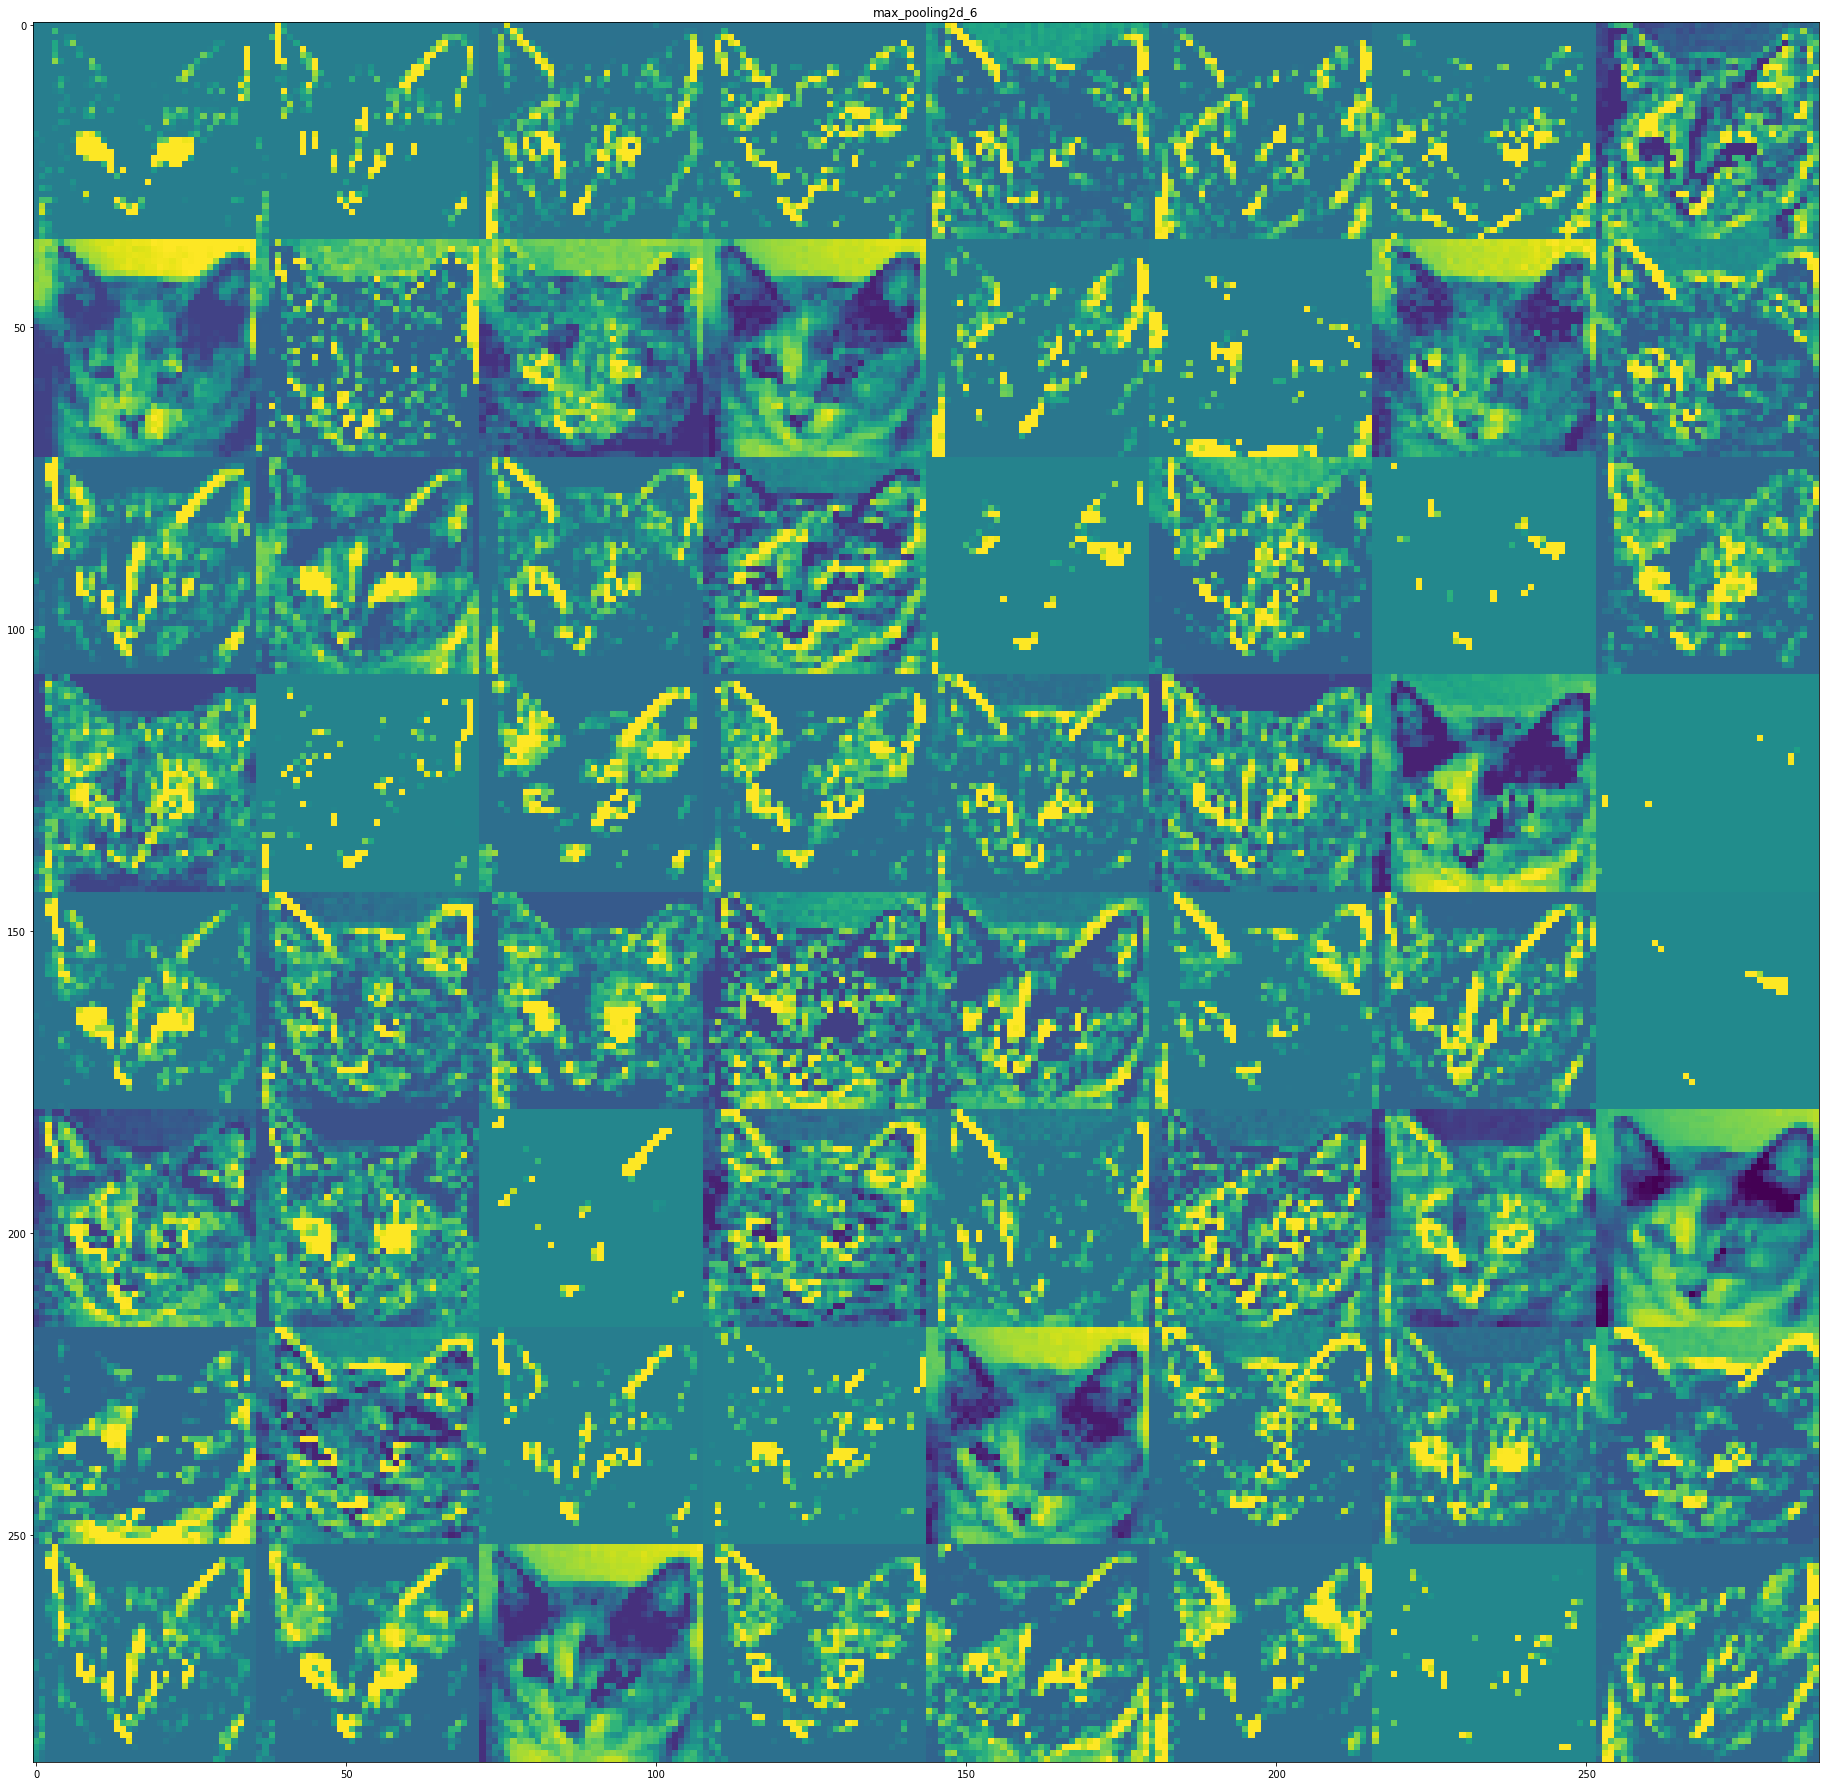

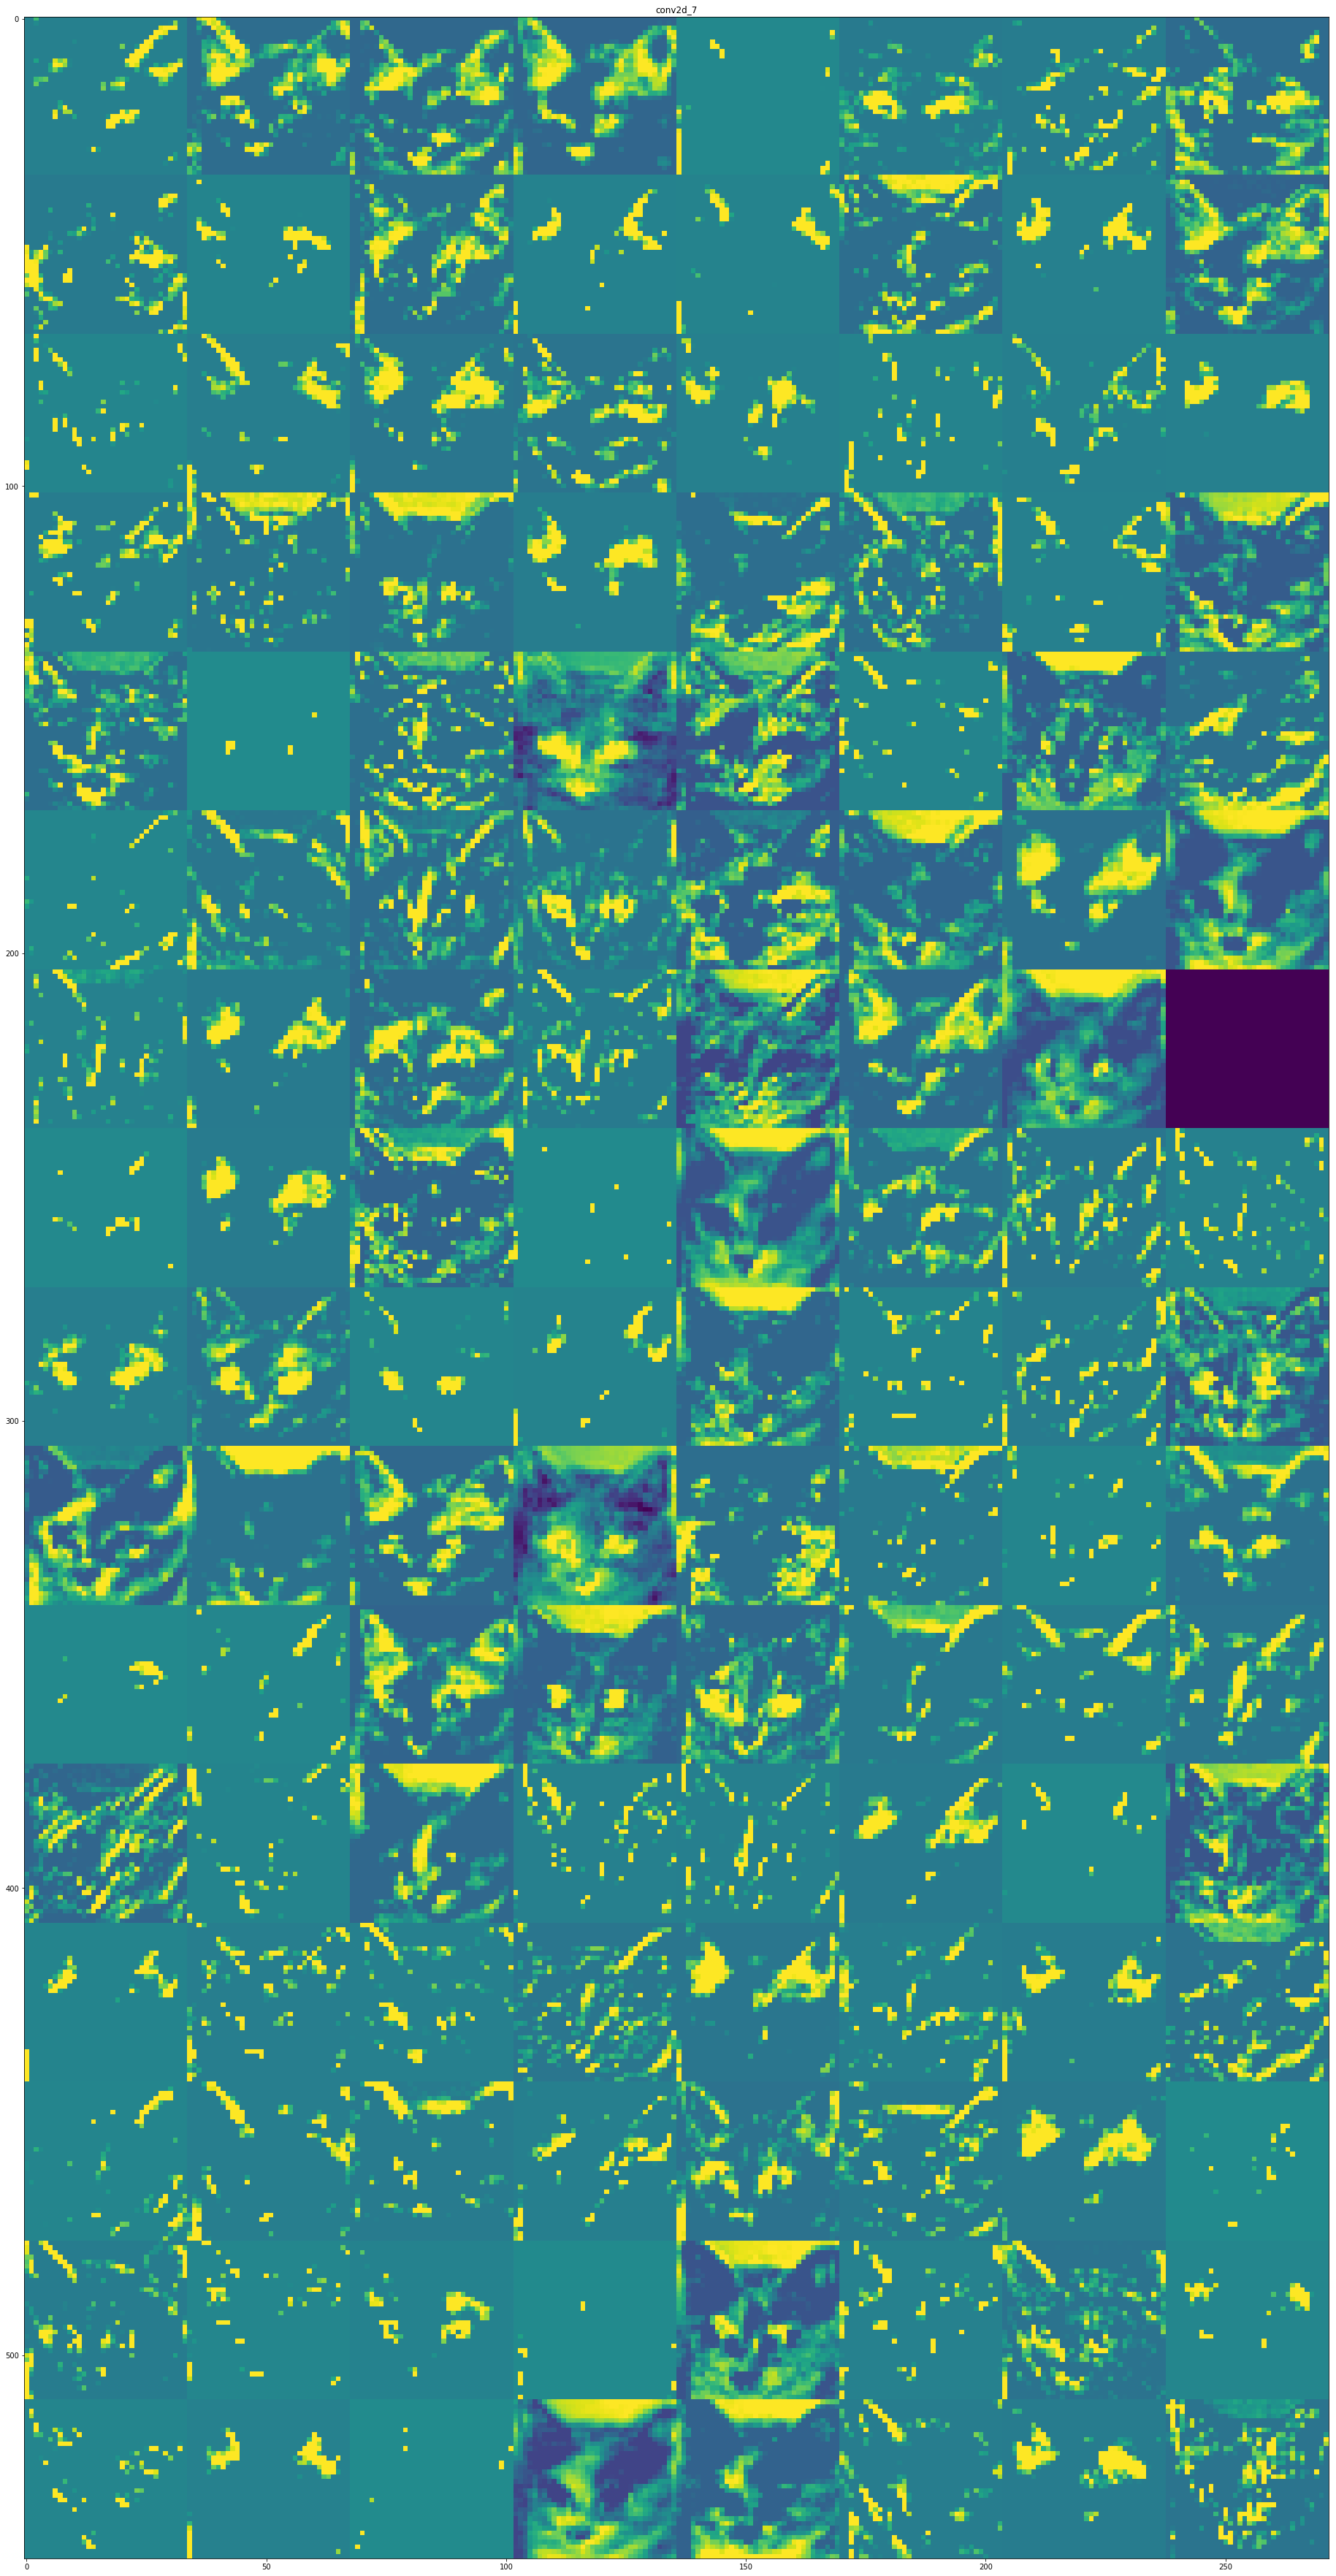

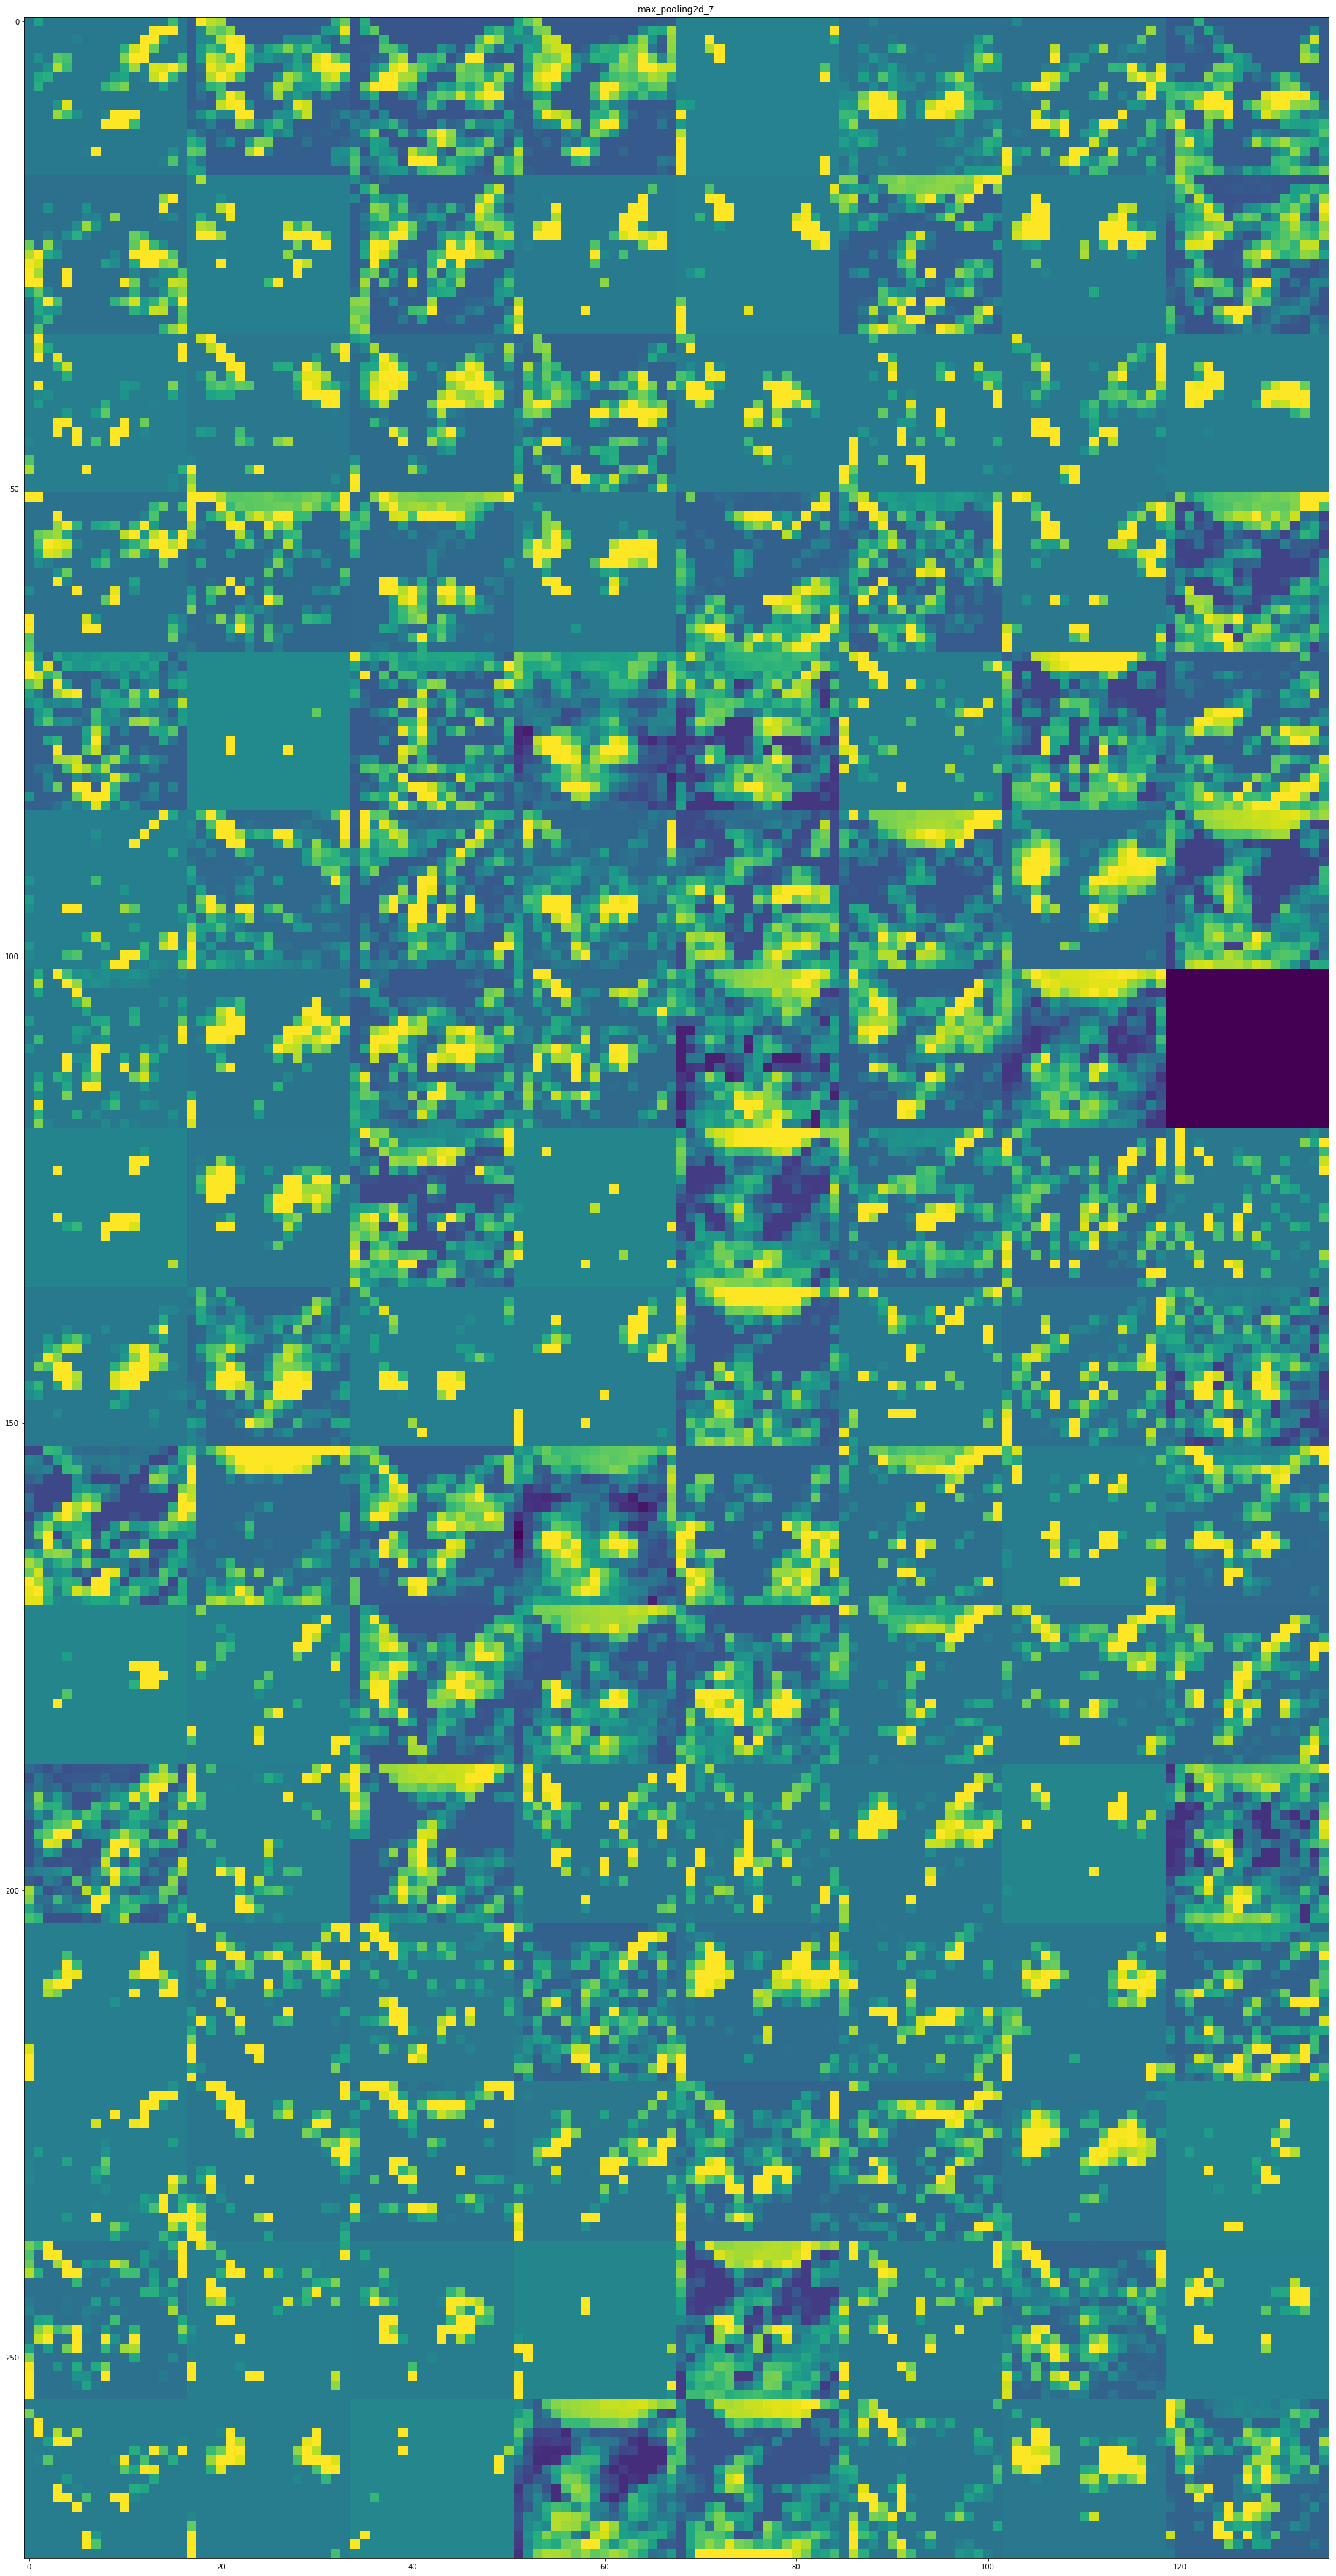

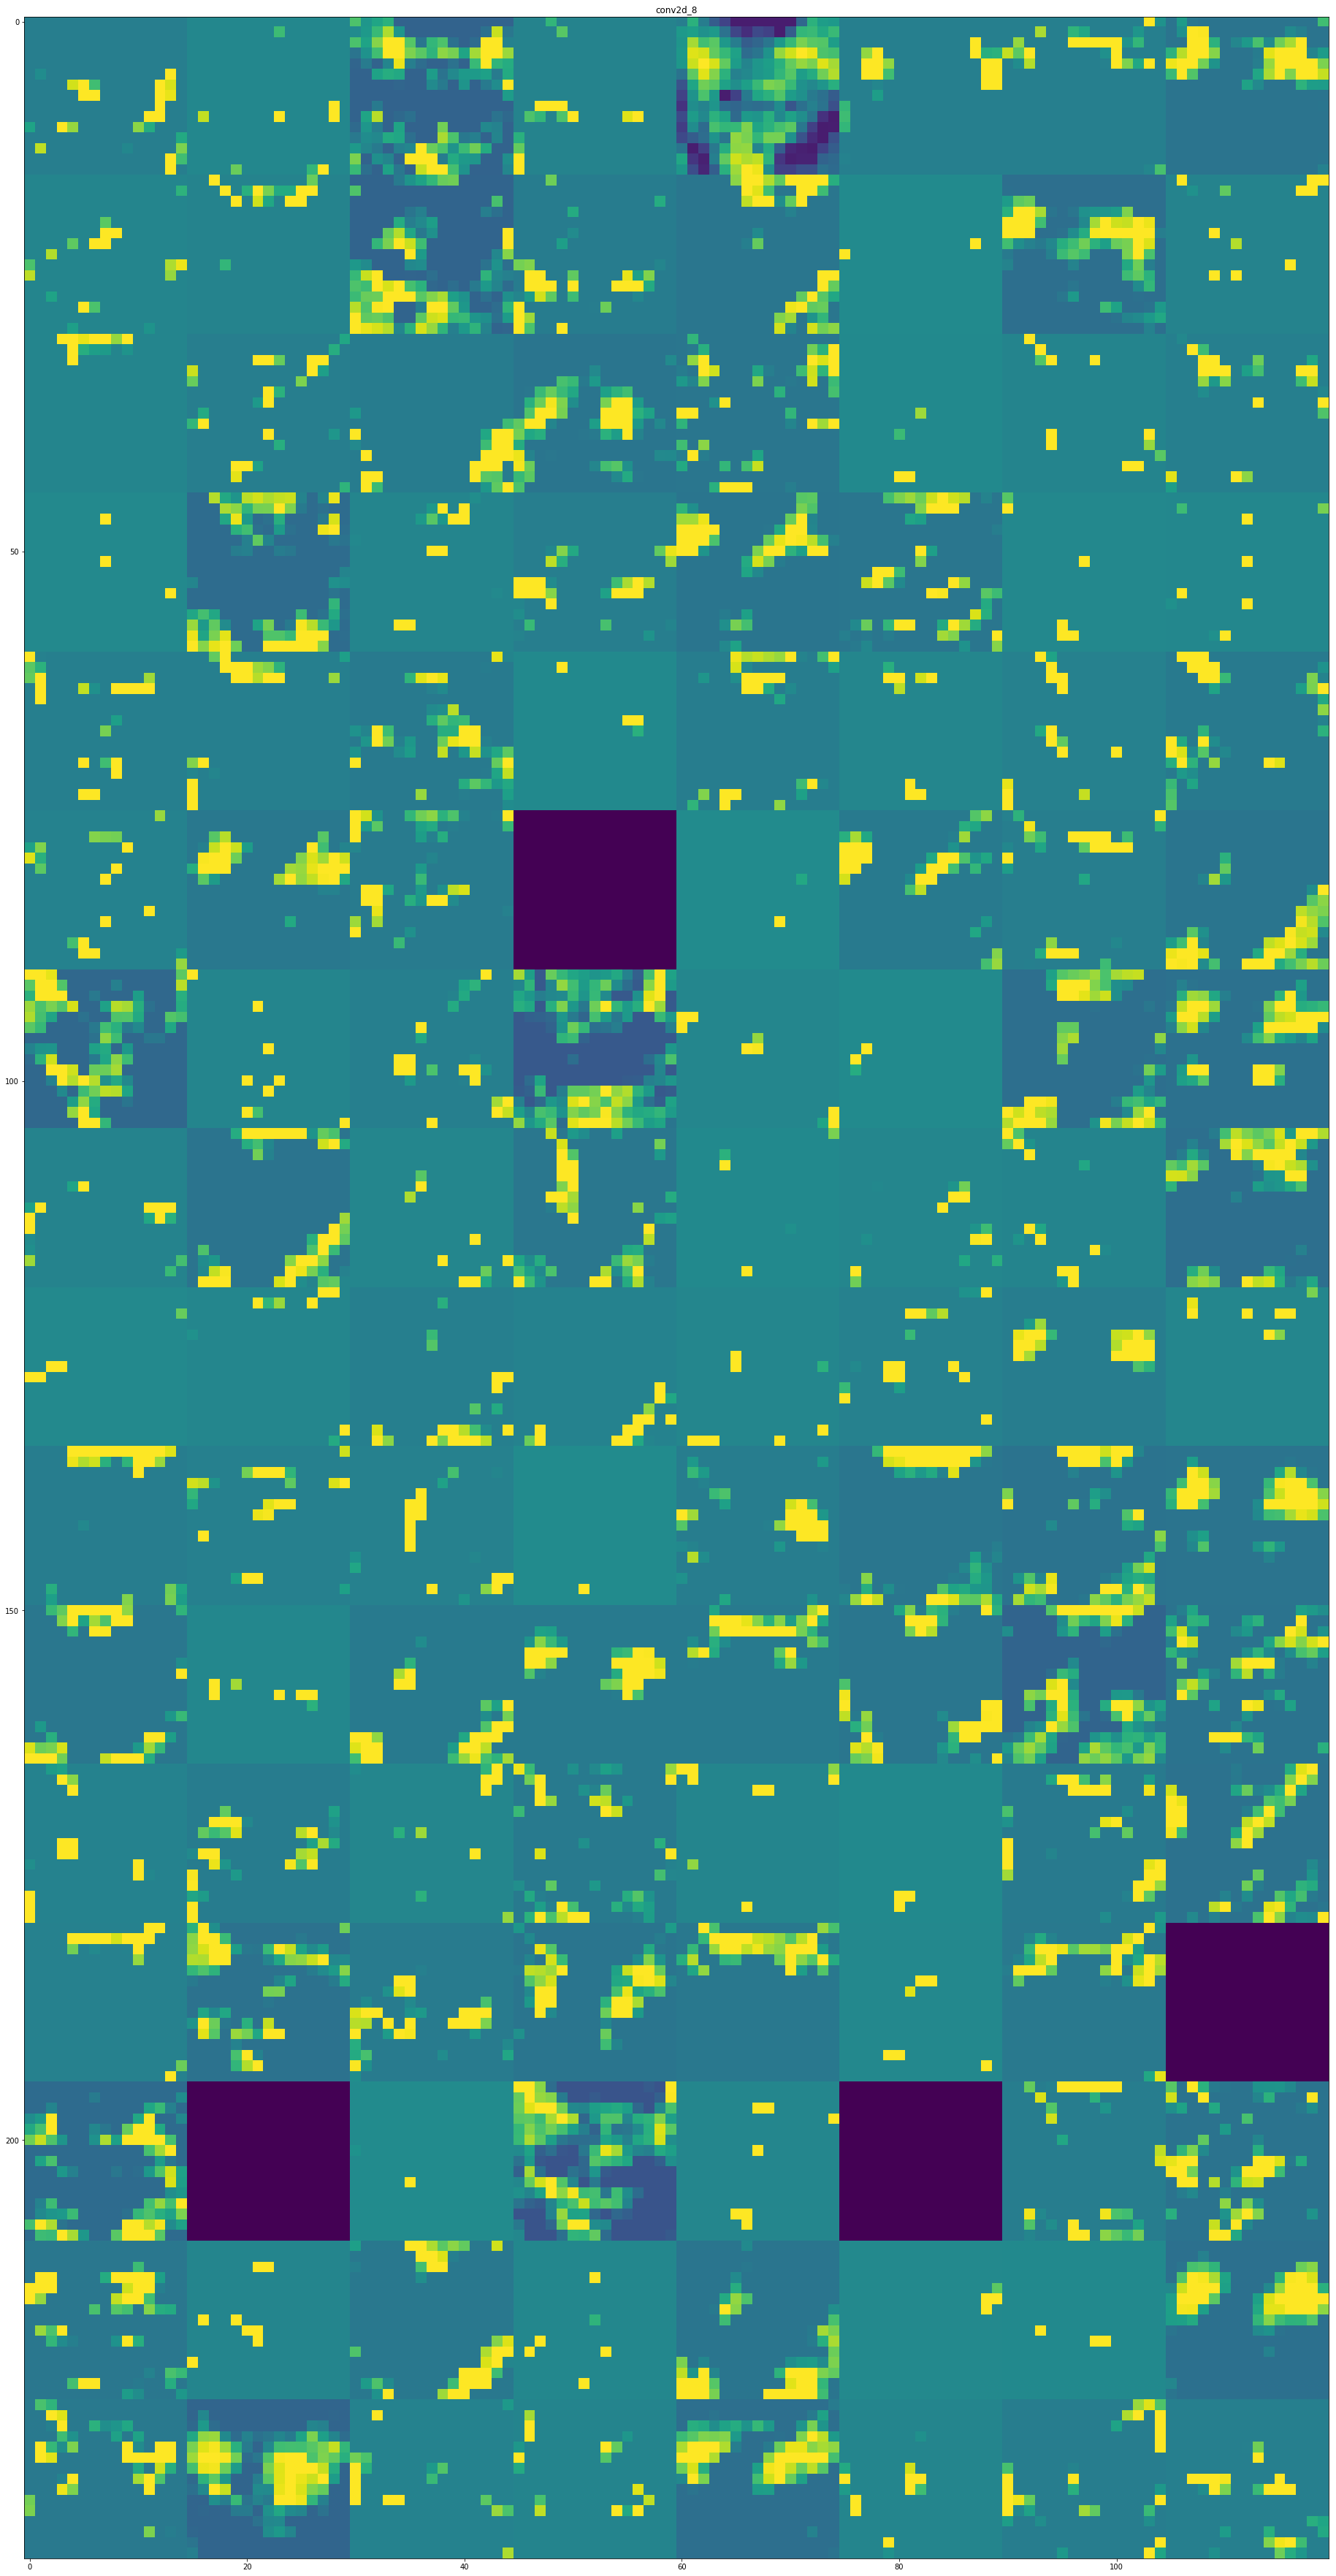

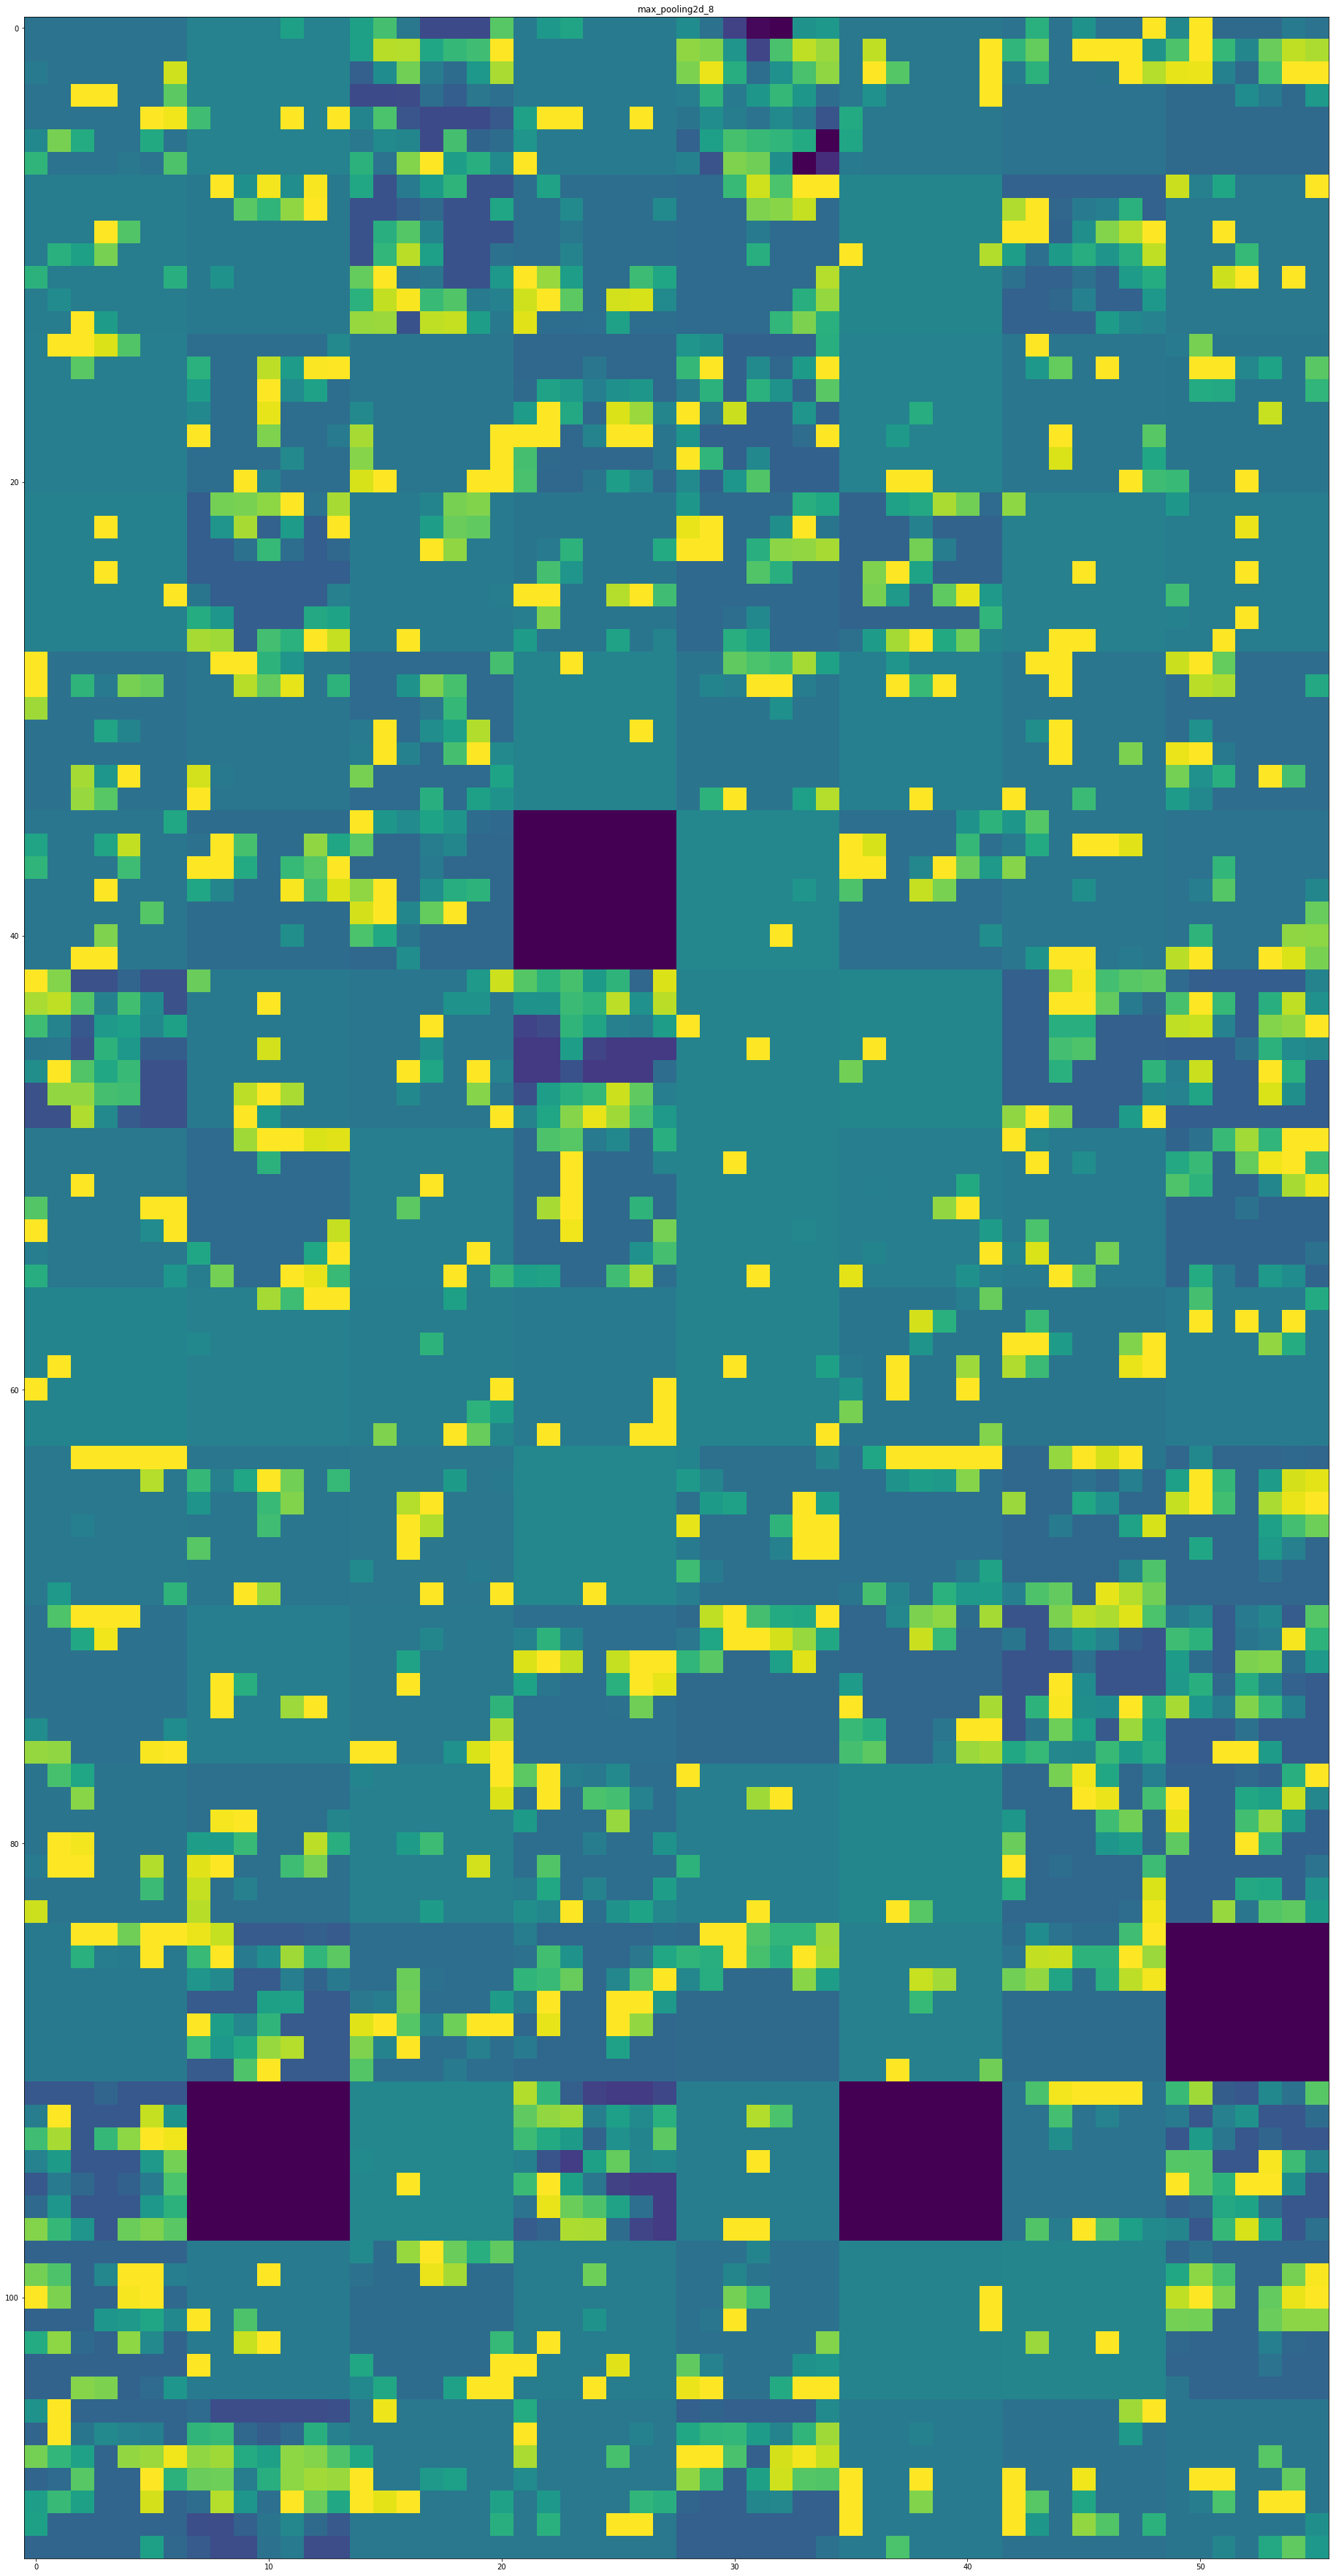

In [76]:
import keras

# 把8个层的层名放入列表，以便画图时显示
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

# 每行显示8个图
images_per_row = 8

# 开始画特征图，按通道循环，一共8个通道
for layer_name, layer_activation in zip(layer_names, activations):
    print(layer_activation.shape)
    # 特征图中特征的个数： layer_activation的形状是(1, 148, 148, 32),取最后一维的数字
    n_features = layer_activation.shape[-1]
    print('特征图中特征的个数:', n_features)
    # 会输出以下信息：
    # 特征图中特征的个数: 32
    # 特征图中特征的个数: 32
    # 特征图中特征的个数: 64
    # 特征图中特征的个数: 64
    # 特征图中特征的个数: 128
    # 特征图中特征的个数: 128
    # 特征图中特征的个数: 128
    # 特征图中特征的个数: 128

    # 取特征图的尺寸
    size = layer_activation.shape[1]

    # 将特征图平铺成一个大表格
    n_cols = n_features // images_per_row  # 表格列数， //表示整除
    display_grid = np.zeros((size * n_cols, images_per_row * size))  # 大表格矩阵的长宽尺寸

    # 把每个特征图平铺
    for col in range(n_cols): # 按列循环
        for row in range(images_per_row): # 按行循环
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # 对特征进行后处理，使其看起来更美观：  好像做不做区别不大，人眼几乎看不出区别
#             channel_image -= channel_image.mean()
#             channel_image /= channel_image.std()
#             channel_image *= 64
#             channel_image += 128
            # clip这个函数将将数组中的元素限制在a_min, a_max之间
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            # 填充表格
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 显示网格
    scale = 4. / size # 可以控制画布大小
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

这里需要注意以下几点:

* 第一层是各种边缘探测器的集合。在这一阶段，激活几乎保留了原始图像中的所有信息。
* 随着层数的加深，激活变得越来越抽象，并且越来越难以直观地理解。它们开始表示更高层次的概念，比如“猫耳朵”和“猫眼睛”。层数越深，其表示中关于图像视觉内容的信息就越少，而关于类别的信息就越多。
* 激活的稀疏度（sparsity）随着层数的加深而增大。在第一层里，所有过滤器都被输入图像激活，但在后面的层里，越来越多的过滤器是空白的。也就是说，输入图像中找不到这些过滤器所编码的模式。


我们刚刚揭示了深度神经网络学到的表示的一个重要普遍特征：随着层数的加深，层所提取的特征变得越来越抽象。更高的层激活包含关于特定输入的信息越来越少，而关于目标的信息越来越多（本例中即图像的类别：猫或狗）。深度神经网络可以有效地作为信息蒸馏管道（information distillation pipeline），输入原始数据（本例中是 RGB 图像），反复对其进行变换，将无关信息过滤掉（比如图像的具体外观），并放大和细化有用的信息（比如图像的类别）。

## 卷积核可视化


想要观察卷积神经网络学到的过滤器，另一种简单的方法是显示每个过滤器所响应的视觉模式。这可以通过在输入空间中进行梯度上升来实现：从空白输入图像开始，将梯度下降应用于卷积神经网络输入图像的值，其目的是让某个过滤器的响应最大化。得到的输入图像是选定过滤器具有最大响应的图像。


这个过程很简单：我们需要构建一个损失函数，其目的是让某个卷积层的某个过滤器的值最大化；然后，我们要使用随机梯度下降来调节输入图像的值，以便让这个激活值最大化。例如，对于在ImageNet 上预训练的VGG16 网络，其block3_conv1层第0 个过滤器激活的损失如下所示：

In [105]:
# 为过滤器的可视化定义损失张量
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet', include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

为了实现梯度下降，我们需要得到损失相对于模型输入的梯度。为此，我们需要使用 Keras的 backend 模块内置的 gradients 函数:

In [106]:
# 获取损失相对于输入的梯度
# 调用 gradients 返回的是一个张量列表（本例中列表长度为 1）。因此，只保留第一个元素，它是一个张量
grads = K.gradients(loss, model.input)[0]
grads.shape

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(3)])

为了让梯度下降过程顺利进行，一个非显而易见的技巧是将梯度张量除以其 L2 范数（张量中所有值的平方的平均值的平方根）来标准化。这就确保了输入图像的更新大小始终位于相同的范围。

In [107]:
# 梯度标准化技巧
# 做除法前加上 1e–5，以防不小心除以0
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

现在我们需要一种方法：给定输入图像，它能够计算损失张量和梯度张量的值。我们可以定义一个 Keras 后端函数来实现此方法：iterate 是一个函数，它将一个 Numpy 张量（表示为长度
为 1 的张量列表）转换为两个 Numpy 张量组成的列表，这两个张量分别是损失值和梯度值。

In [108]:
iterate = K.function([model.input], [loss, grads])

# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

定义一个 Python 循环来进行随机梯度下降:

In [109]:
# 通过随机梯度下降让损失最大化
# 从一张带有噪声的灰度图像开始
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# 运行40 次梯度上升
step = 1.  # 每次梯度更新的步长
for i in range(40):
    # 计算损失值和梯度值
    loss_value, grads_value = iterate([input_img_data])
    # 沿着使损失最大化的方向调节输入图像
    input_img_data += grads_value * step

得到的图像张量是形状为 (1, 150, 150, 3) 的浮点数张量，其取值可能不是 [0, 255] 区间内的整数。因此，需要对这个张量进行后处理，将其转换为可显示的图像。  
下面这个简单的实用函数可以做到这一点。

In [110]:
# 将张量转换为有效图像的实用函数
def deprocess_image(x):
    # n对张量做标准化，使其均值为 0，标准差为 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # 将 x 裁切（clip）到 [0, 1] 区间
    x += 0.5
    x = np.clip(x, 0, 1)

    # 转化成RGB数组
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

接下来，我们将上述代码片段放到一个 Python 函数中，输入一个层的名称和一个过滤器索引，
它将返回一个有效的图像张量，表示能够将特定过滤器的激活最大化的模式。

In [168]:
def generate_pattern(layer_name, filter_index, size=150):
    # 构建一个损失函数，将该层第 n 个过滤器的激活最大化
    try:
        layer_output = model.get_layer(layer_name).output
    except Exception as e:
        print('No layers: ', layer_name)
        return np.zeros((size, size, 3))
        
    
    loss = K.mean(layer_output[:, :, :, filter_index])

    # 计算这个损失相对于输入图像的梯度
    grads = K.gradients(loss, model.input)[0]

    # 标准化技巧：将梯度标准化
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # 返回给定输入图像的损失和梯度
    iterate = K.function([model.input], [loss, grads])
    
    # W从带有噪声的灰度图像开始
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # 运行 40 次梯度上升
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

试一下这个函数：

No layers:  block4_ conv1


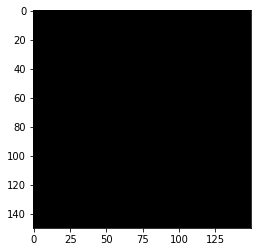

In [171]:
plt.figure(figsize=(4, 4))
plt.imshow(generate_pattern('block4_conv1', 0))
plt.show()

看起来，block3_conv1 层第 0 个过滤器响应的是波尔卡点（polka-dot）图案。

下面来看有趣的部分：我们可以将每一层的每个过滤器都可视化。  
为了简单起见，我们只查看每一层的前 64 个过滤器，并只查看每个卷积块的第一层（即 block1_conv1、block2_conv1、block3_conv1、block4_ conv1、block5_conv1）。  
我们将输出放在一个 8×8 的网格中，每个网格是一个 64 像素×64 像素的过滤器模式，两个过滤器模式之间留有一些黑边。
为了笔记本运行快捷，把8x8改成了2x2。

now show layer:  block1_conv1


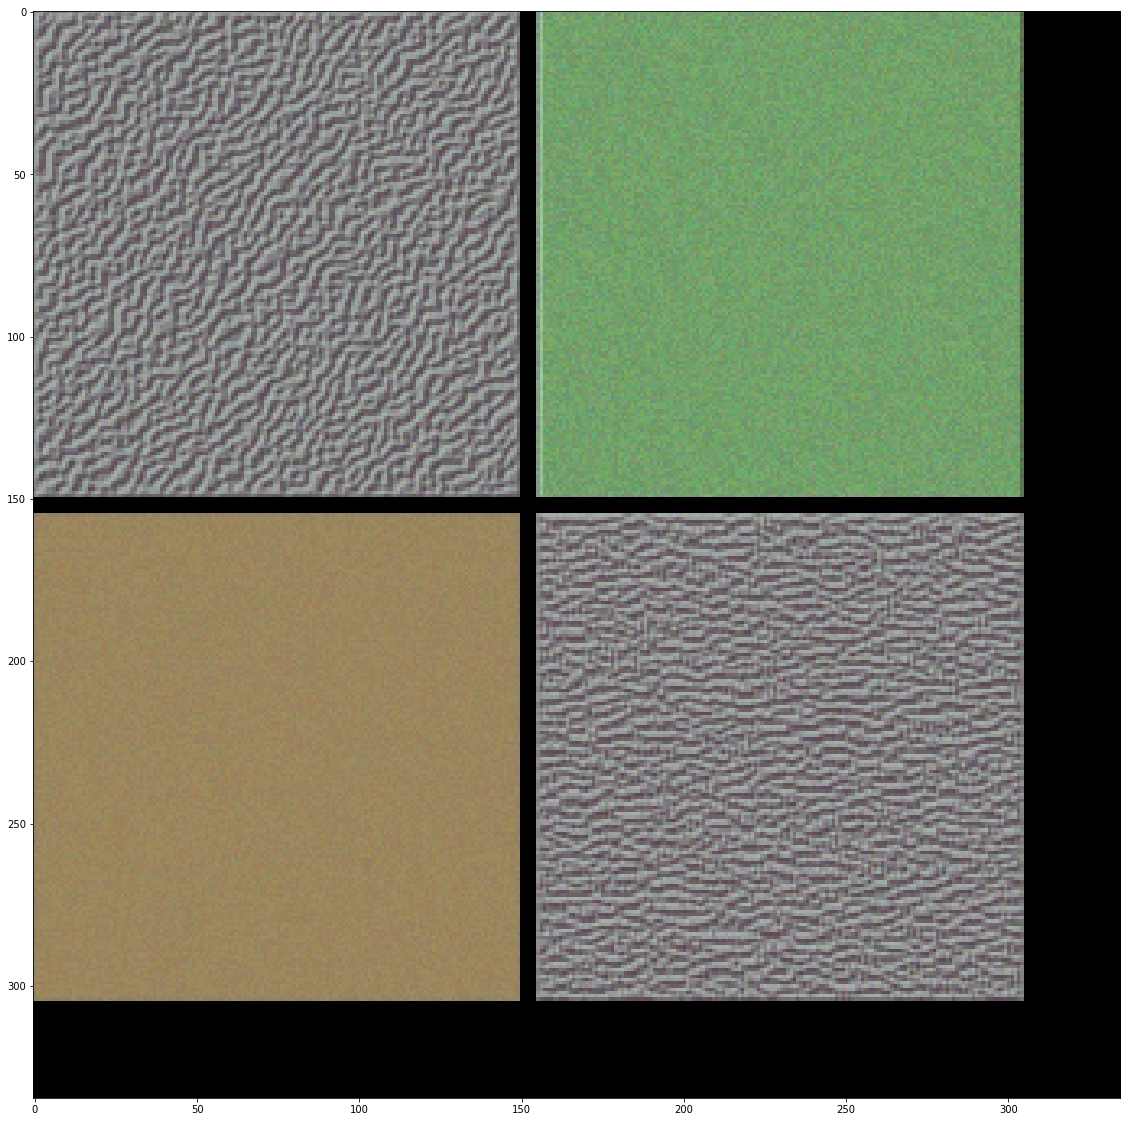

now show layer:  block2_conv1


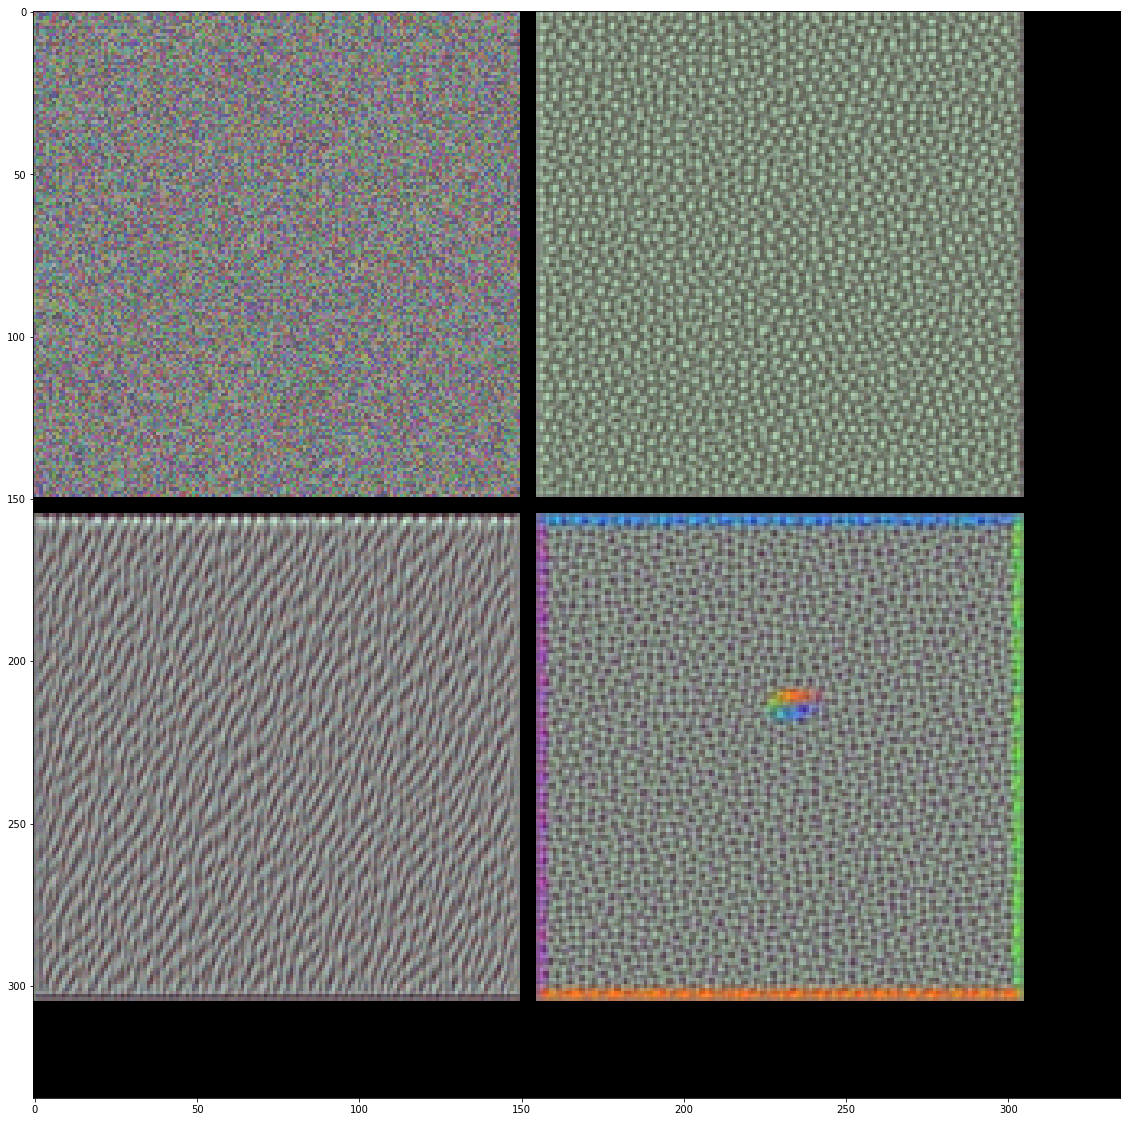

now show layer:  block3_conv1


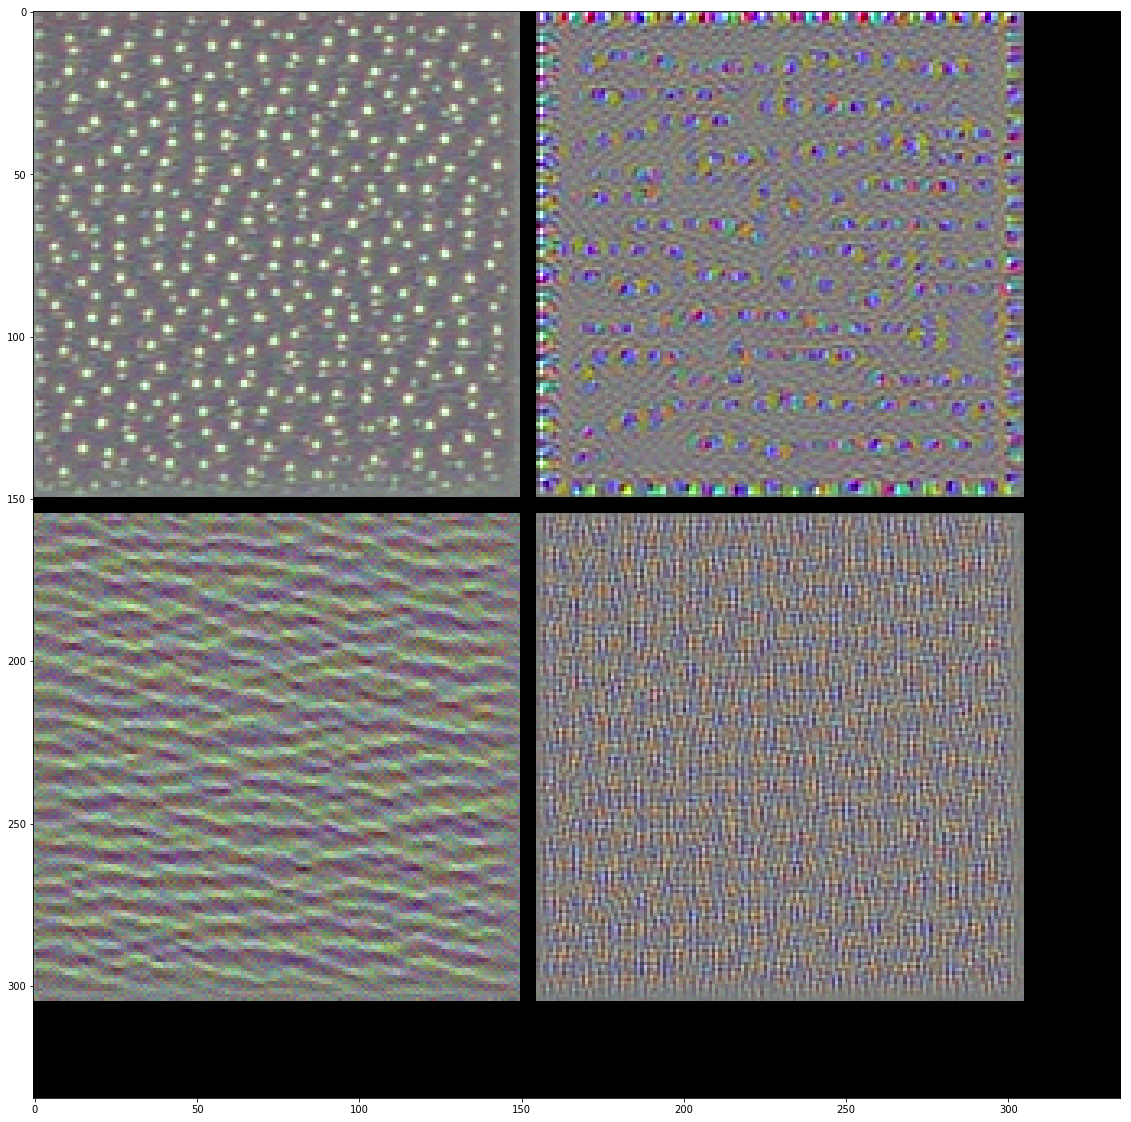

now show layer:  block4_conv1


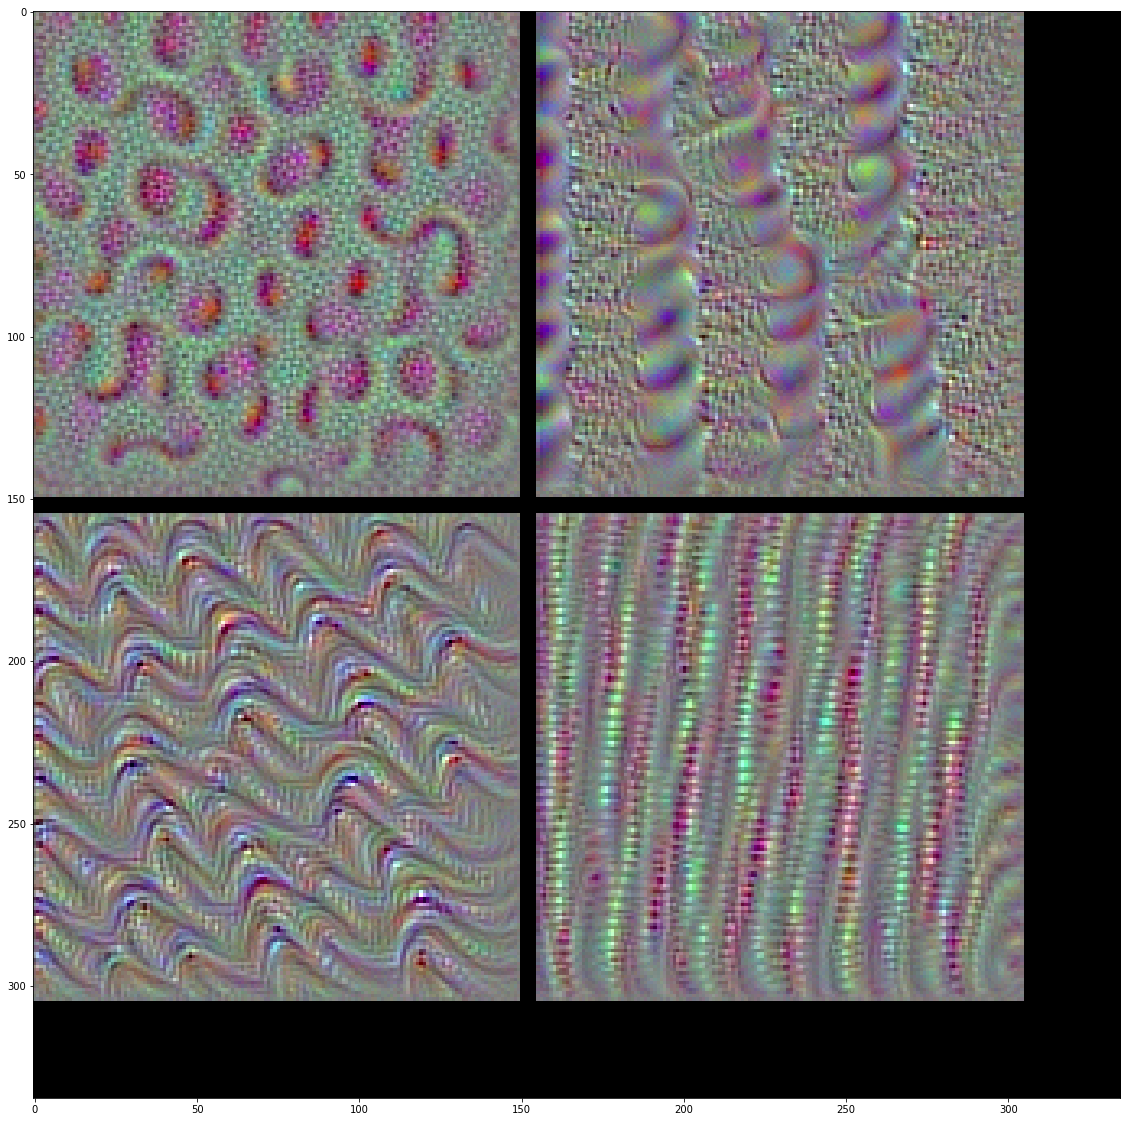

now show layer:  block5_conv1


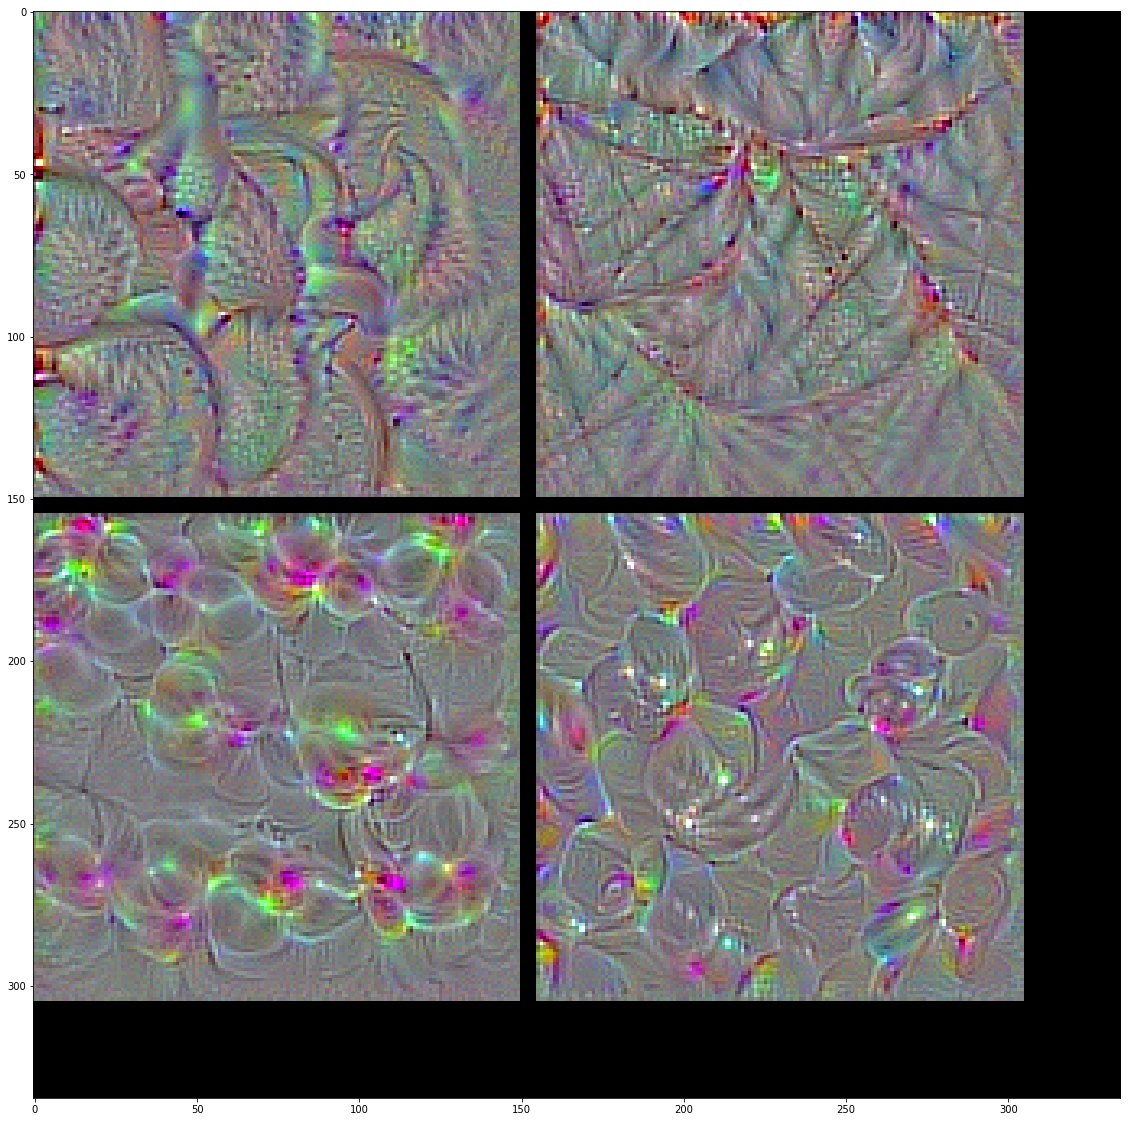

In [172]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']:
    size = 150
    margin = 5

    # 空图像（全黑色,黑色的画布），用于保存结果
    results = np.zeros((2 * size + 7 * margin, 2 * size + 7 * margin, 3))

    for i in range(2):  # 遍历 results 网格的行
        for j in range(2):  # 遍历 results 网格的列
            # 生成 layer_name层第 i + （j * 8）个过滤器的模式
            filter_img = generate_pattern(layer_name, i + (j * 2), size=size)

            # 将结果放到 results 网格第 (i, j) 个方块中
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    plt.figure(figsize=(20, 20))
    # 把结果数组的类型转化为uint，否则图像显示为白板
    plt.imshow(results.astype(np.uint))
    # 显示 results 网格
    print('now show layer: ', layer_name)
    plt.show()

这些过滤器可视化包含卷积神经网络的层如何观察世界的很多信息：卷积神经网络中每一层都学习一组过滤器，以便将其输入表示为过滤器的组合。这类似于傅里叶变换将信号分解为一组余弦函数的过程。随着层数的加深，卷积神经网络中的过滤器变得越来越复杂，越来越精细。
* 模型第一层（block1_conv1）的过滤器对应简单的方向边缘和颜色（还有一些是彩色边缘）。
* block2_conv1 层的过滤器对应边缘和颜色组合而成的简单纹理。
* 更高层的过滤器类似于自然图像中的纹理：羽毛、眼睛、树叶等。

## 类激活图的热力图可视化

介绍另一种可视化方法，它有助于了解一张图像的哪一部分让卷积神经网络做出了最终的分类决策。 这有助于对卷积神经网络的决策过程进行调试，特别是出现分类错误的情况下。
这种方法还可以定位图像中的特定目标。

这种通用的技术叫作类激活图（CAM，class activation map）可视化，它是指对输入图像生成类激活的热力图。  
类激活热力图是与特定输出类别相关的二维分数网格，对任何输入图像的每个位置都要进行计算，它表示每个位置对该类别的重要程度。  

我们将使用的具体实现方式是“Grad-CAM: visual explanations from deep networks via gradient-based localization”论文中描述的方法。  
这种方法非常简单：给定一张输入图像，对于一个卷积层的输出特征图，用类别相对于通道的梯度对这个特征图中的每个通道进行加权。  
直观上来看，理解这个技巧的一种方法是，我们用“每个通道对类别的重要程度”对“输入图像对不同通道的激活强度”的空间图进行加权，从而得到了“输入图像对类别的激活强度”的空间图。  
我们再次使用预训练的 VGG16 网络来演示此方法。  

In [177]:
# 加载带有预训练权重的 VGG16 网络
from keras.applications.vgg16 import VGG16

K.clear_session()

# 注意，网络中包括了密集连接分类器。在前面所有的例子中，我们都舍弃了这个分类器
model = VGG16(weights='imagenet')

看下面这张有两头非洲象的图片:

<img src='https://s3.amazonaws.com/book.keras.io/img/ch5/creative_commons_elephant.jpg' width='50%' height='50%' />

将这张图像转换为 VGG16 模型能够读取的格式：模型在大小为224×224 的图像上进行训练，这些训练图像都根据 keras.applications.vgg16.preprocess_input 函数中内置的规则进行预处理。  
因此，我们需要加载图像，将其大小调整为 224×224，然后将其转换为 float32 格式的 Numpy 张量，并应用这些预处理规则。

In [226]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# 图片路径
# 非洲象
img_path = 'D:\\aiProject\\jupyterNotebook\\DeepLeaningWithPython\\img\\elephant.jpg'
# 狼
# img_path = 'D:\\aiProject\\jupyterNotebook\\DeepLeaningWithPython\\img\\lang.jpg'
# 哈士奇
# img_path = 'D:\\aiProject\\jupyterNotebook\\DeepLeaningWithPython\\img\\hashiqi.jpg'
# 金毛
# img_path = 'D:\\aiProject\\jupyterNotebook\\DeepLeaningWithPython\\img\\jinmao.jpg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# 对批量进行预处理（按通道进行颜色标准化）
x = preprocess_input(x)

In [227]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.9094207), ('n01871265', 'tusker', 0.08618318), ('n02504013', 'Indian_elephant', 0.004354581)]


对这张图像预测的前三个类别分别为：
 非洲象（African elephant，90.9% 的概率）
 长牙动物（tusker，8% 的概率）
 印度象（Indian elephant，0.4% 的概率）
网络识别出图像中包含数量不确定的非洲象。预测向量中被最大激活的元素是对应“非洲象”类别的元素，索引编号为 386

In [228]:
np.argmax(preds[0])

386

为了展示图像中哪些部分最像非洲象，我们来使用 Grad-CAM 算法:

In [229]:
# 应用 Grad-CAM 算法
# 预测向量中的“非洲象”元素
african_elephant_output = model.output[:, 386]

# block5_conv3 层的输出特征图，它是 VGG16 的最后一个卷积层
last_conv_layer = model.get_layer('block5_conv3')

# “非洲象”类别相对于 block5_conv3输出特征图的梯度
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# 形状为 (512,) 的向量，每个元素是特定特征图通道的梯度平均大小
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# 访问刚刚定义的量：对于给定的样本图像，pooled_grads 和 block5_conv3 层的输出特征图
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# 对于两个大象的样本图像，这两个量都是 Numpy 数组
pooled_grads_value, conv_layer_output_value = iterate([x])

# 将特征图数组的每个通道乘以“这个通道对‘大象’类别的重要程度”
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# 得到的特征图的逐通道平均值即为类激活的热力图
heatmap = np.mean(conv_layer_output_value, axis=-1)

为了便于可视化，我们还需要将热力图标准化到 0~1 范围内:

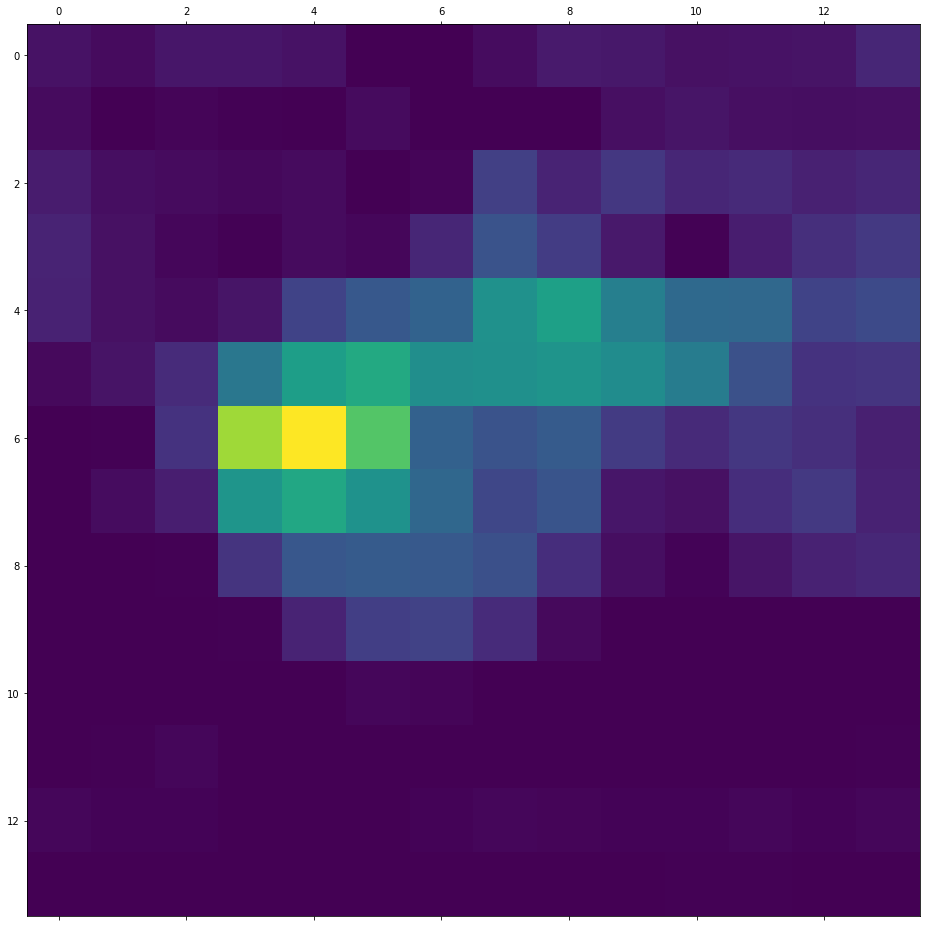

In [230]:
# 热力图后处理
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

最后，我们可以用 OpenCV 来生成一张图像，将原始图像叠加在刚刚得到的热力图上:

In [231]:
import cv2

# 用 cv2 加载原始图像
img = cv2.imread(img_path)

# 将热力图的大小调整为与原始图像相同
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# 将热力图转换为 RGB 格式
heatmap = np.uint8(255 * heatmap)

# 将热力图应用于原始图像
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 这里的 0.4 是热力图强度因子
superimposed_img = heatmap * 0.4 + img

# 将图像保存到硬盘
cv2.imwrite('D:\\aiProject\\jupyterNotebook\\DeepLeaningWithPython\\img\\elephant_cam.jpg', superimposed_img)

True

![elephant cam](https://s3.amazonaws.com/book.keras.io/img/ch5/elephant_cam.jpg)

这种可视化方法回答了两个重要问题：
* 网络为什么会认为这张图像中包含一头非洲象？
* 非洲象在图像中的什么位置？
尤其值得注意的是，小象耳朵的激活强度很大，这可能是网络找到的非洲象和印度象的不同之处。
